# <font color = 'green'> Telecom Churn Case Study

**Problem statement:**
The main objective of this case study is to identify important predictors which causes customer churn in the telecom industry. The dataset contains the customer churn data for a period of 3 months (June, July and August). <br><br> Using this dataset, we need to identify if a particular customer will churn or not. Additionally, we need to analyse the data of high value customers and observe the features which are strong indicators of their churn.

**Inputs used**:
1. train.csv
2. test(1).csv

**Algorithms used**:
- Logistic Regression with RFE
- Logistic Regression with PCA
- XGBoost
- Random Forest
- Light GBM
- Catboost

#### Table of contents
- [Libraries and dataset import](#id1)
- [Basic sanitisation and analysis](#id2)
- [User defined functions](#id3)
- [EDA on train dataset](#id4)
- [EDA on test dataset](#id5)
- [Feature scaling](#id6)
- [Split X and y datasets](#id7)

**Model building**
- [Logistic with RFE](#id8)
- [Logistic with RFE + manual tuning](#id9)
- [Logistic with PCA](#id10)
- [XGBoost (default)](#id11)
- [XGBoost with hyperparameter](#id12)
- [Random Forest Ensemble](#id13)
- [Random Forest with hyperparameter tuning](#id14)
- [LGBM Classifier](#id15)
- [LGBM Classifier with hyperparameter tuning](#id16)
- [CatBoost (default)](#id17)
- [CatBoost with hyperparameter tuning](#id18)
- [Stacked model](#id19)

**Important predictors for telecom churn**
- [Feature importance with xgboost classifier](#id20)
- [Feature importance with Random forest classifier](#id21)
- [Feature importance with LGBM classifier](#id22)
- [Feature importance with CAT boost classifier](#id23)

**Business recomendation**
- [Business recommendations](#id24)
- [Model selection based on other business objectives](#id25)

**Data dictionary**
- [Data dictionary](#id26)

## <a id="id1">Libraries and dataset import</id>

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import plot_importance
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import datasets - train & test
telecom_train = pd.read_csv("train.csv")
telecom_test = pd.read_csv("test (1).csv")

## <a id="id2">Basic sanitisation and analysis</a>

In [3]:
# Check first few rows of train dataset
display(telecom_train.head(2))

# Checking shape of datasets
print('telecom_train:',telecom_train.shape)
print('telecom_test:',telecom_test.shape)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.0,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.0,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.0,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0


telecom_train: (69999, 172)
telecom_test: (30000, 171)


In [4]:
# Dropping duplicate rows if any
telecom_train.drop_duplicates(inplace=True)

# Dropping rows with all NaN values
print (telecom_train.shape)
telecom_train.dropna(axis=0, how='all', inplace=True)
print (telecom_train.shape)

(69999, 172)
(69999, 172)


In [5]:
# Checking the distribution of churn_probability
telecom_train['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

## <a id="id3">User defined functions</a>

In [6]:
# User defined functions
def drop_last_date_of_month_cols(df):
    cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
    df.drop(columns=cols, axis=1, inplace=True)
    return df

def drop_date_attributes(df):
    dt_cols = ['date_of_last_rech_6', 
               'date_of_last_rech_7', 
               'date_of_last_rech_8', 
               'date_of_last_rech_data_6', 
               'date_of_last_rech_data_7', 
               'date_of_last_rech_data_8']
    df.drop(columns=dt_cols, axis=1, inplace=True)
    return df

def drop_count_and_max_rech_attributes(df):
    count_rech_cols = ['count_rech_2g_6', 
                       'count_rech_2g_7', 
                       'count_rech_2g_8',
                       'total_rech_num_6', 
                       'total_rech_num_7', 
                       'total_rech_num_8',
                       'count_rech_3g_6', 
                       'count_rech_3g_7', 
                       'count_rech_3g_8',
                       'max_rech_amt_6', 
                       'max_rech_amt_7', 
                       'max_rech_amt_8',
                       'max_rech_data_6', 
                       'max_rech_data_7', 
                       'max_rech_data_8']
    df.drop(columns=count_rech_cols, axis=1, inplace=True)
    return df

def impute_rech_cols(df):
    rech_cols = ['total_rech_data_6', 
                 'total_rech_data_7', 
                 'total_rech_data_8',
                 'av_rech_amt_data_6', 
                 'av_rech_amt_data_7', 
                 'av_rech_amt_data_8']
    df[rech_cols] = df[rech_cols].fillna(value=0.0)
    return df

def calc_total_data_rech(df):
    df['tot_amt_rech_data_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
    df['tot_amt_rech_data_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
    df['tot_amt_rech_data_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']
    return df

def calc_total_amt_rech(df):
    df['tot_amt_rech_6'] = df['tot_amt_rech_data_6'] * df['total_rech_amt_6']
    df['tot_amt_rech_7'] = df['tot_amt_rech_data_7'] * df['total_rech_amt_7']
    df['tot_amt_rech_8'] = df['tot_amt_rech_data_8'] * df['total_rech_amt_8']
    return df

def drop_rech_cols(df):
    rech_cols = [
        'total_rech_data_6', 
        'total_rech_data_7', 
        'total_rech_data_8',
        'av_rech_amt_data_6', 
        'av_rech_amt_data_7', 
        'av_rech_amt_data_8',
        'tot_amt_rech_data_6', 
        'tot_amt_rech_data_7', 
        'tot_amt_rech_data_8',
        'total_rech_amt_6', 
        'total_rech_amt_7', 
        'total_rech_amt_8'
    ]
    df.drop(columns=rech_cols, axis=1, inplace=True)
    return df

def drop_night_pck_cols(df):
    night_pck_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
    df.drop(columns=night_pck_cols, axis=1, inplace=True)
    return df

def impute_fb_user_cols(df):
    fb_user_cols = ['fb_user_6', 'fb_user_7', 'fb_user_8']
    df[fb_user_cols] = df[fb_user_cols].fillna(value=0.0)
    return df

def drop_arpu_g_cols(df):
    arpu_g_cols = ['arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8', 'arpu_2g_8']
    df.drop(columns=arpu_g_cols, axis=1, inplace=True)
    return df

def calc_mean_avg_rech_amt(df):
    total_amt_rech_cols = ['tot_amt_rech_6', 'tot_amt_rech_7', 'tot_amt_rech_8']    
    df['mean_avg_rech_amt'] = (df['tot_amt_rech_6'] + df['tot_amt_rech_7'] + df['tot_amt_rech_8'])/3
    return df

def drop_t2o_mou_cols(df):
    t2o_mou_cols = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
    df.drop(columns=t2o_mou_cols, axis=1, inplace=True)
    return df

def drop_loc_og_mou_cols(df):
    loc_og_mou_cols = [
        'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
        'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
        'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8'
    ]
    df.drop(columns=loc_og_mou_cols, axis=1, inplace=True)
    return df

def drop_std_og_mou_cols(df):
    std_og_mou_cols = [
        'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6',
        'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7',
        'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8'
    ]
    df.drop(columns=std_og_mou_cols, axis=1, inplace=True)
    return df

def drop_loc_ic_mou_cols(df):
    loc_ic_mou_cols = [
        'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
        'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7',
        'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8'
    ]
    df.drop(columns=loc_ic_mou_cols, axis=1, inplace=True)
    return df

def drop_std_ic_mou_cols(df):
    std_ic_mou_cols = [
        'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 
        'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7',
        'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8'
    ]
    df.drop(columns=std_ic_mou_cols, axis=1, inplace=True)
    return df

def calc_vol_mb(df):
    df['vol_mb_6'] = df['vol_2g_mb_6'] + df['vol_3g_mb_6']
    df['vol_mb_7'] = df['vol_2g_mb_7'] + df['vol_3g_mb_7']
    df['vol_mb_8'] = df['vol_2g_mb_8'] + df['vol_3g_mb_8']
    return df

def drop_vol_g_cols(df):
    vol_g_cols = [
        'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
        'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'
    ]
    df.drop(columns=vol_g_cols, axis=1, inplace=True)
    return df

def calc_sachet(df):
    df['sachet_6'] = df['sachet_2g_6'] + df['sachet_3g_6']
    df['sachet_7'] = df['sachet_2g_7'] + df['sachet_3g_7']
    df['sachet_8'] = df['sachet_2g_8'] + df['sachet_3g_8']
    return df

def drop_sachet_g_cols(df):
    sachet_g_cols = [
        'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
        'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'
    ]
    df.drop(columns=sachet_g_cols, inplace=True, axis=1)
    return df

def calc_monthly_packs(df):
    df['monthly_6'] = df['monthly_2g_6'] + df['monthly_3g_6']
    df['monthly_7'] = df['monthly_2g_7'] + df['monthly_3g_7']
    df['monthly_8'] = df['monthly_2g_8'] + df['monthly_3g_8']
    return df

def drop_monthly_g_cols(df):
    monthly_g_cols = [
        'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
        'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'
    ]
    df.drop(columns = monthly_g_cols, axis=1, inplace=True)
    return df

def drop_vbc_cols(df):
    vbc_cols = ['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g']
    df.drop(columns=vbc_cols, axis=1, inplace=True)
    return df

def drop_ic_mou_cols(df):
    ic_mou_cols = [
        'loc_ic_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
        'loc_ic_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7',
        'loc_ic_mou_8', 'std_ic_mou_8',  'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8'
    ]
    df.drop(columns=ic_mou_cols, axis=1, inplace=True)
    return df

def drop_og_mou_cols(df):
    og_mou_cols = [
        'loc_og_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6',
        'loc_og_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7',
        'loc_og_mou_8', 'std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8'
    ]
    df.drop(columns=og_mou_cols, axis=1, inplace=True)
    return df

# Function to plot ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

# Functions to eliminate feature display features
def vif_features():
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = columns
    vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

def build_model(columns, column_to_drop):
    # Assessing the model by dropping features with high VIF and p-value
    columns = columns.drop(column_to_drop)
    X_train_sm = sm.add_constant(X_train[columns])
    log_m2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    res = log_m2.fit()
    print (res.summary())
    return X_train_sm,res,columns

# Get confusion matrix
def get_confusion_matrix(df):
    return pd.crosstab(df.actual_churn, df.predicted_churn)
    
# Accuracy calculation
def calculate_accuracy(df):
    accuracy = accuracy_score(df.actual_churn, df.predicted_churn)
    accuracy_scores.append(accuracy)
    return accuracy_scores

# Precision calculation
def calculate_precision_score(df):
    precision = precision_score(df.actual_churn, df.predicted_churn)
    precision_scores.append(precision)
    return precision_scores

# Recall calculation
def calculate_recall_score(df):
    recall = recall_score(df.actual_churn, df.predicted_churn)
    recall_scores.append(recall)
    return recall_scores

# F1 score calculation
def calculate_f1_score(df):
    f1 = f1_score(df.actual_churn, df.predicted_churn)
    f1_scores.append(f1)
    return f1_scores

def get_metrics(model_name, df):
    model_names.append(model_name)
    print ('----- Confusion Matrix -----')
    print (get_confusion_matrix(df))
    print ('----------------------------')
    accuracy = calculate_accuracy(df)
    precision = calculate_precision_score(df)
    recall = calculate_recall_score(df)
    f1 = calculate_f1_score(df)
    return pd.DataFrame({'Accuracy': accuracy, 
                         'Precision': precision, 
                         'Recall': recall, 
                         'F1 Score': f1}, index=model_names)

def get_final_metrics():
    return pd.DataFrame({'Accuracy': accuracy_scores, 
                         'Precision': precision_scores, 
                         'Recall': recall_scores, 
                         'F1 Score': f1_scores}, index=model_names)

# Predict on train dataset using a classifier
def predict_train_dataset(X_train, y_train, classifier):
    # Predict values
    y_train_pred = classifier.predict(X_train)
    
    # Create dataframe with actual churn probabilities and predicted churn probabilities
    telecom_churn = pd.DataFrame({'actual_churn': y_train, 'predicted_churn_prob': y_train_pred})
    telecom_churn['cust_id'] = y_train.index
    telecom_churn['predicted_churn'] = telecom_churn.predicted_churn_prob.map(lambda x: 1 if x > 0.5 else 0)
    return telecom_churn
    
# Export test predictions
def assess_and_export_predictions(X_test, X_test_sm, classifier, index):
    y_test_pred = classifier.predict(X_test_sm)
    
    # Derive probabilities
    telecom_test_predictions = pd.DataFrame({'id': X_test.id, 'churn_probability': y_test_pred})
    telecom_test_predictions.churn_probability = telecom_test_predictions.churn_probability.map(lambda x: 1 if x > 0.5 else 0)
    telecom_test_predictions.head()
    
    # Export predicted values to csv
    file_name = "predictions"+str(index)+".csv"
    telecom_test_predictions.to_csv(file_name, columns = ['id', 'churn_probability'], index=False)
    return telecom_test_predictions
    

## <a id="id4">EDA on Train dataset</a>

#### variable : circle_id

In [7]:
# Checking unique values for circle_id
print (telecom_train['circle_id'].astype("category").value_counts())

109    69999
Name: circle_id, dtype: int64


In [8]:
# Dropping circle_id column as it contains only single circle
telecom_train.drop(columns=['circle_id'], inplace=True)

#### variable : id

In [9]:
# Dropping the Id column from train dataset
telecom_train.drop(columns=['id'], inplace=True)

#### categorical columns

In [10]:
# Object columns
object_columns = telecom_train.columns[ telecom_train.dtypes == 'O']
print(object_columns.shape)
object_columns

(9,)


Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [11]:
# Checking first few rows of date columns
telecom_train[object_columns].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [12]:
# Percentage of missing values in date columns
(telecom_train[object_columns].isnull().sum()/telecom_train.shape[0] * 100).sort_values(ascending=False)

date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
date_of_last_rech_8          3.515765
date_of_last_rech_7          1.762882
date_of_last_rech_6          1.572880
last_date_of_month_8         1.047158
last_date_of_month_7         0.570008
last_date_of_month_6         0.000000
dtype: float64

In [13]:
# Checking unique values from train dataset
for col in object_columns:
    print ("Columne name : {} , Unique values : {}".format(col,telecom_train[col].nunique()))

Columne name : last_date_of_month_6 , Unique values : 1
Columne name : last_date_of_month_7 , Unique values : 1
Columne name : last_date_of_month_8 , Unique values : 1
Columne name : date_of_last_rech_6 , Unique values : 30
Columne name : date_of_last_rech_7 , Unique values : 31
Columne name : date_of_last_rech_8 , Unique values : 31
Columne name : date_of_last_rech_data_6 , Unique values : 30
Columne name : date_of_last_rech_data_7 , Unique values : 31
Columne name : date_of_last_rech_data_8 , Unique values : 31


In [14]:
# Dropping the columns containing only single unique value
#telecom_train = drop_last_date_of_month_cols(telecom_train)

# The null values in the date columns might signify that the customer hasn't recharged in that particular month
# Also, the date of recharge in each month is not a significant factor in identifying whether a customer will churn
# Since the customers can have 3 months recharge plan as well.
# We will drop the date columns
#telecom_train = drop_date_attributes(telecom_train)

#### new feature creation 

In [15]:
# calculating difference in dates
telecom_train['diff_days_1_rech'] = abs(pd.to_datetime(telecom_train['date_of_last_rech_6']) - pd.to_datetime(telecom_train['date_of_last_rech_7']))
telecom_train['diff_days_1_rech'] =telecom_train['diff_days_1_rech']/np.timedelta64(1,'D')

telecom_train['diff_days_2_rech'] = abs(pd.to_datetime(telecom_train['date_of_last_rech_7']) - pd.to_datetime(telecom_train['date_of_last_rech_8']))
telecom_train['diff_days_2_rech'] =telecom_train['diff_days_2_rech']/np.timedelta64(1,'D')

telecom_train['diff_days_1_rech_data'] = abs(pd.to_datetime(telecom_train['date_of_last_rech_data_6']) - pd.to_datetime(telecom_train['date_of_last_rech_data_7']))
telecom_train['diff_days_1_rech_data'] =telecom_train['diff_days_1_rech_data']/np.timedelta64(1,'D')

telecom_train['diff_days_2_rech_data'] = abs(pd.to_datetime(telecom_train['date_of_last_rech_data_7']) - pd.to_datetime(telecom_train['date_of_last_rech_data_8']))
telecom_train['diff_days_2_rech_data'] =telecom_train['diff_days_2_rech_data']/np.timedelta64(1,'D')

telecom_train = telecom_train.fillna(0)

print('diff_days_1_rech:',telecom_train['diff_days_1_rech'].min(),telecom_train['diff_days_1_rech'].max())
print('diff_days_2_rech:',telecom_train['diff_days_2_rech'].min(),telecom_train['diff_days_2_rech'].max())
print('diff_days_1_rech_data:',telecom_train['diff_days_1_rech_data'].min(),telecom_train['diff_days_1_rech_data'].max())
print('diff_days_2_rech_data:',telecom_train['diff_days_2_rech_data'].min(),telecom_train['diff_days_2_rech_data'].max())

telecom_train = telecom_train.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                                    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','date_of_last_rech_data_6', 
                'date_of_last_rech_data_7','date_of_last_rech_data_8'],axis = 1)
print(telecom_train.shape)
telecom_train.head(2)

diff_days_1_rech: 0.0 60.0
diff_days_2_rech: 0.0 61.0
diff_days_1_rech_data: 0.0 60.0
diff_days_2_rech_data: 0.0 61.0
(69999, 165)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,...,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,diff_days_1_rech,diff_days_2_rech,diff_days_1_rech_data,diff_days_2_rech_data
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.0,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.0,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0,18.0,45.0,0.0,0.0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.0,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0,28.0,47.0,0.0,0.0


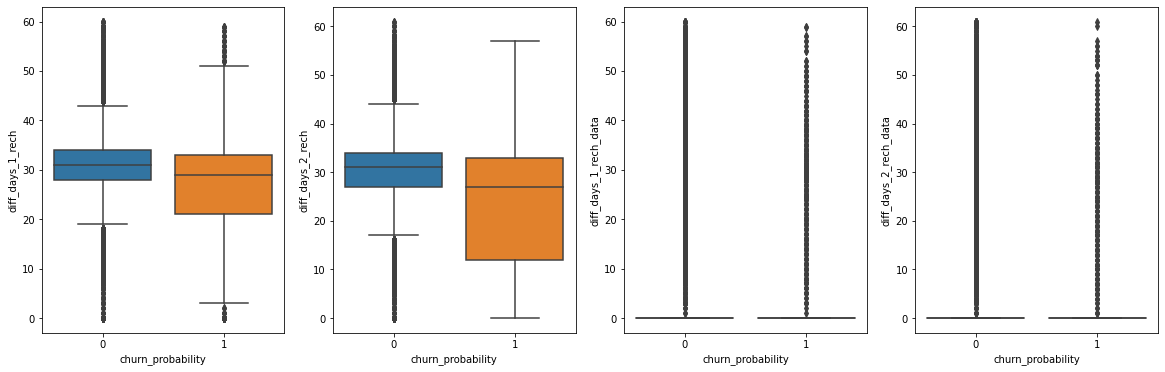

In [16]:
# Plot for diff_days_1_rech, diff_days_2_rech, diff_days_1_rech_data, diff_days_2_rech_data
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
sns.boxplot(data=telecom_train, x='churn_probability', y='diff_days_1_rech')

plt.subplot(1,4,2)
sns.boxplot(data=telecom_train, x='churn_probability', y='diff_days_2_rech')

plt.subplot(1,4,3)
sns.boxplot(data=telecom_train, x='churn_probability', y='diff_days_1_rech_data')

plt.subplot(1,4,4)
sns.boxplot(data=telecom_train, x='churn_probability', y='diff_days_2_rech_data')
plt.show()

#### variable : reacharge

In [17]:
# Recharge related attributes
rech_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
                'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [18]:
# Dropping columns related to count and max_rech
telecom_train = drop_count_and_max_rech_attributes(telecom_train)

In [19]:
# Imputing the values for total_rech_data and av_rech_amt_data with 0 for NaN assuming that no recharge was done
telecom_train = impute_rech_cols(telecom_train)

In [20]:
# Derving total recharge amount per user per month
# Total recharge amount per month = Total data recharge + Total amount recharge
# Total data recharge can be calculated using the attributes total_rech_data and av_rech_amt_data
# Total data recharge = Total recharge data * Average recharge amount for data
telecom_train = calc_total_data_rech(telecom_train)

In [21]:
# Computing the value of total recharge done by the user per month
# Total recharge amount per month = Total data recharge + Total amount recharge
telecom_train = calc_total_amt_rech(telecom_train)

In [22]:
# Dropping the original columns
telecom_train = drop_rech_cols(telecom_train)

In [23]:
# Checking the percentage of missing values in train dataset
train_missing_cols = (telecom_train.isnull().sum()/telecom_train.shape[0] * 100).sort_values(ascending=False)
train_missing_cols = train_missing_cols[ train_missing_cols > 0 ]
train_missing_cols

Series([], dtype: float64)

In [24]:
# Checking columns containing > 70% missing values
columns = train_missing_cols[ train_missing_cols > 70 ].keys()
columns

Index([], dtype='object')

#### variable : night_pck

In [25]:
# Percentage of users availing night pack service in June
print ("June - {} %".format(telecom_train['night_pck_user_6'].sum()/len(telecom_train) * 100))

# Percentage of users availing night pack service in June
print ("July - {} %".format(telecom_train['night_pck_user_7'].sum()/len(telecom_train) * 100))

# Percentage of users availing night pack service in June
print ("August - {} %".format(telecom_train['night_pck_user_8'].sum()/len(telecom_train) * 100))

June - 0.634294775639652 %
July - 0.6142944899212845 %
August - 0.5528650409291561 %


In [26]:
# Since less than 1 % of users use night pack service, we will drop these columns
telecom_train = drop_night_pck_cols(telecom_train)

#### variable : fb_user

In [27]:
# Percentage of users availing facebook service in June
print ("June - {} %".format(telecom_train['fb_user_6'].sum()/len(telecom_train) * 100))

# Percentage of users availing facebook service in June
print ("July - {} %".format(telecom_train['fb_user_7'].sum()/len(telecom_train) * 100))

# Percentage of users availing facebook service in June
print ("August - {} %".format(telecom_train['fb_user_8'].sum()/len(telecom_train) * 100))

June - 22.997471392448464 %
July - 23.213188759839426 %
August - 23.424620351719312 %


In [28]:
# Imputing the missing values of fb_user fields with 0 values 
# assuming that missing values means the user isn't using facebook service on that operator
telecom_train = impute_fb_user_cols(telecom_train)

#### variable : arpu

In [29]:
# Dropping the arpu_*g columns since the dataset contains arpu_6, arpu_7, arpu_8 columns
telecom_train = drop_arpu_g_cols(telecom_train)

#### extracting high value customers

In [30]:
# Extracting high value customers based on the mean value of total recharge amount in the months of June and July
telecom_train = calc_mean_avg_rech_amt(telecom_train)

In [31]:
# Filtering only high value customers from train dataset
telecom_train = telecom_train[ telecom_train['mean_avg_rech_amt'] >= telecom_train['mean_avg_rech_amt'].quantile(0.70)]
print (telecom_train.shape)

(21004, 136)


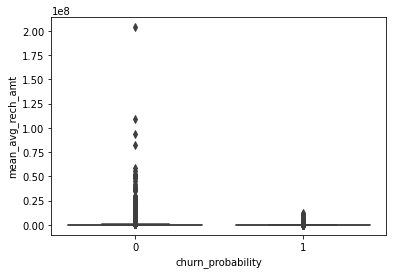

In [32]:
# Plot for mean average recharge amount 
sns.boxplot(data=telecom_train, x='churn_probability', y='mean_avg_rech_amt')
plt.show()

In [33]:
#telecom_train['mean_avg_rech_amt']
telecom_train['mean_avg_rech_amt'].describe([0.33, 0.55, 0.75, 0.95, 0.98, 0.99])

count    2.100400e+04
mean     4.111887e+05
std      2.503639e+06
min      1.050000e+04
33%      4.702131e+04
50%      8.848300e+04
55%      1.068081e+05
75%      2.560670e+05
95%      1.264920e+06
98%      2.867513e+06
99%      5.029415e+06
max      2.036506e+08
Name: mean_avg_rech_amt, dtype: float64

In [34]:
# Removing outliers on mean average recharge amount
print (len(telecom_train[ telecom_train['mean_avg_rech_amt'] > telecom_train['mean_avg_rech_amt'].quantile(0.98) ]))
telecom_train = telecom_train[ telecom_train['mean_avg_rech_amt'] <= telecom_train['mean_avg_rech_amt'].quantile(0.98)]
print (telecom_train.shape)

421
(20583, 136)


**We can see that there are ~ 21K high value customers.**

In [35]:
# Checking the percentage of missing values in train dataset
train_missing_cols = (telecom_train.isnull().sum()/telecom_train.shape[0] * 100).sort_values(ascending=False)
train_missing_cols = train_missing_cols[ train_missing_cols > 0 ]
train_missing_cols

Series([], dtype: float64)

In [36]:
# Imputing the missing values for high value customers with 0
telecom_train.fillna(value=0.0, inplace=True)
telecom_train.shape

(20583, 136)

#### variable :loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou

In [37]:
# Analysing variables loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
print (telecom_train['loc_og_t2o_mou'].nunique())
print (telecom_train['std_og_t2o_mou'].nunique())
print (telecom_train['loc_ic_t2o_mou'].nunique())

1
1
1


In [38]:
# Dropping loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
telecom_train = drop_t2o_mou_cols(telecom_train)

#### variable : loc_og_mou_6, loc_og_mou_7, loc_og_mou_8

In [39]:
# Verifying the local outgoing minutes of usage
# loc_og_mou_6 -> sum (loc_og_t2t_mou_6, loc_og_t2m_mou_6, loc_og_t2f_mou_6, loc_og_t2c_mou_6)
# loc_og_mou_7 -> sum (loc_og_t2t_mou_7, loc_og_t2m_mou_7, loc_og_t2f_mou_7, loc_og_t2c_mou_7)
# loc_og_mou_8 -> sum (loc_og_t2t_mou_8, loc_og_t2m_mou_8, loc_og_t2f_mou_8, loc_og_t2c_mou_8)

In [40]:
# Verifying the aggregation between different columns related to local outgoing

loc_og_mou_6_cols = ['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6']
loc_og_mou_7_cols = ['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7']
loc_og_mou_8_cols = ['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8']

loc_og_mou_cols = loc_og_mou_6_cols + loc_og_mou_7_cols + loc_og_mou_8_cols

telecom_train['total_loc_og_mou_6'] = telecom_train[loc_og_mou_6_cols].sum(axis=1)
telecom_train['total_loc_og_mou_7'] = telecom_train[loc_og_mou_7_cols].sum(axis=1)
telecom_train['total_loc_og_mou_8'] = telecom_train[loc_og_mou_8_cols].sum(axis=1)

print (len(telecom_train[ (telecom_train['loc_og_mou_6'] - telecom_train['total_loc_og_mou_6']) > 1 ]))
print (len(telecom_train[ (telecom_train['loc_og_mou_7'] - telecom_train['total_loc_og_mou_7']) > 1 ]))
print (len(telecom_train[ (telecom_train['loc_og_mou_8'] - telecom_train['total_loc_og_mou_8']) > 1 ]))

0
0
0


In [41]:
# Since the sum matches with the attributes loc_og_mou_6, loc_og_mou_7, loc_og_mou_8
# we will continue to drop other columns
telecom_train = drop_loc_og_mou_cols(telecom_train)

In [42]:
# Drop derived total columns
derived_total_loc_og_cols = ['total_loc_og_mou_6', 'total_loc_og_mou_7', 'total_loc_og_mou_8']
telecom_train.drop(columns=derived_total_loc_og_cols, axis=1, inplace=True)

In [43]:
# Verifying the STD outgoing minutes of usage
# std_og_mou_6 -> sum (std_og_t2t_mou_6, std_og_t2m_mou_6, std_og_t2f_mou_6, std_og_t2c_mou_6)
# std_og_mou_7 -> sum (std_og_t2t_mou_7, std_og_t2m_mou_7, std_og_t2f_mou_7, std_og_t2c_mou_7)
# std_og_mou_8 -> sum (std_og_t2t_mou_8, std_og_t2m_mou_8, std_og_t2f_mou_8, std_og_t2c_mou_8)

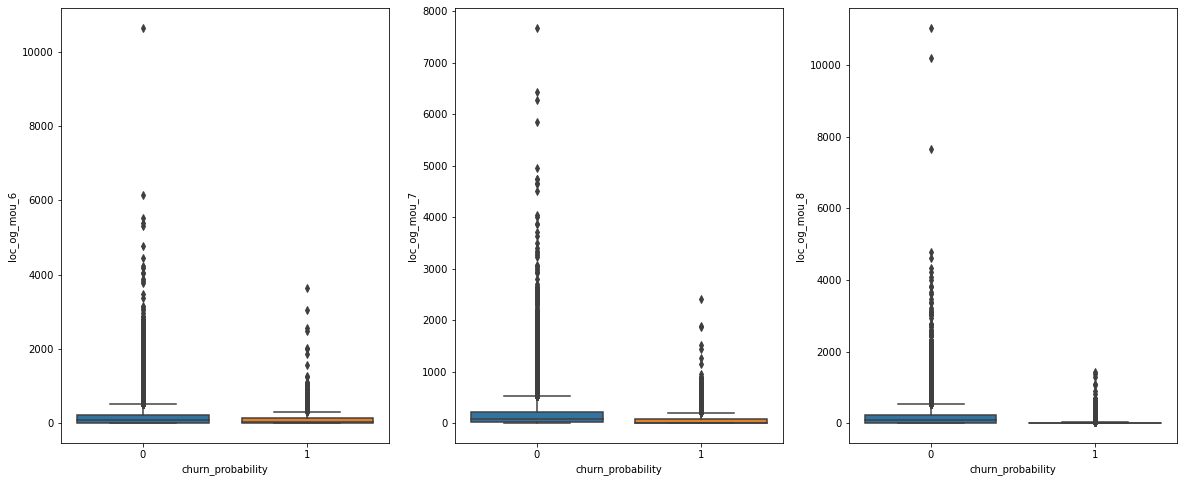

In [44]:
# Plot for local outgoing minutes of usage in June, July and August
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.boxplot(data=telecom_train, x='churn_probability', y='loc_og_mou_6')

plt.subplot(1,3,2)
sns.boxplot(data=telecom_train, x='churn_probability', y='loc_og_mou_7')

plt.subplot(1,3,3)
sns.boxplot(data=telecom_train, x='churn_probability', y='loc_og_mou_8')

plt.show()

#### variable : std_og_mou_6, std_og_mou_7, std_og_mou_8

In [45]:
# Verifying the aggregation between different columns related to local outgoing
std_og_mou_6_cols = ['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6']
std_og_mou_7_cols = ['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7']
std_og_mou_8_cols = ['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8']

loc_og_mou_cols = std_og_mou_6_cols + std_og_mou_7_cols + std_og_mou_8_cols

telecom_train['total_std_og_mou_6'] = telecom_train[std_og_mou_6_cols].sum(axis=1)
telecom_train['total_std_og_mou_7'] = telecom_train[std_og_mou_7_cols].sum(axis=1)
telecom_train['total_std_og_mou_8'] = telecom_train[std_og_mou_8_cols].sum(axis=1)

print (len(telecom_train[ (telecom_train['std_og_mou_6'] - telecom_train['total_std_og_mou_6']) > 1 ]))
print (len(telecom_train[ (telecom_train['std_og_mou_7'] - telecom_train['total_std_og_mou_7']) > 1 ]))
print (len(telecom_train[ (telecom_train['std_og_mou_8'] - telecom_train['total_std_og_mou_8']) > 1 ]))

0
0
0


In [46]:
# Since the sum matches with the attributes std_og_mou_6, std_og_mou_7, std_og_mou_8
# we will continue to drop other columns
telecom_train = drop_std_og_mou_cols(telecom_train)

In [47]:
# Drop derived total columns
derived_total_std_og_cols = ['total_std_og_mou_6', 'total_std_og_mou_7', 'total_std_og_mou_8']
telecom_train.drop(columns=derived_total_std_og_cols, axis=1, inplace=True)

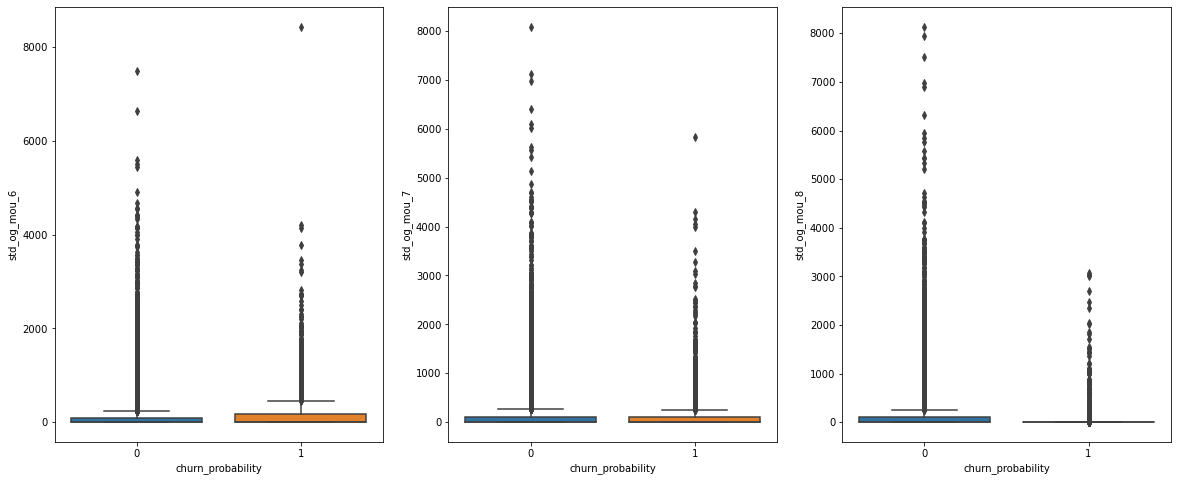

In [48]:
# Plot for std outgoing minutes of usage in June, July and August
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.boxplot(data=telecom_train, x='churn_probability', y='std_og_mou_6')

plt.subplot(1,3,2)
sns.boxplot(data=telecom_train, x='churn_probability', y='std_og_mou_7')

plt.subplot(1,3,3)
sns.boxplot(data=telecom_train, x='churn_probability', y='std_og_mou_8')

plt.show()

#### variable : loc_ic_mou_6_cols ,loc_ic_mou_7_cols, loc_ic_mou_8_cols

In [49]:
# Verifying the aggregation between different columns related to local outgoing
loc_ic_mou_6_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6']
loc_ic_mou_7_cols = ['loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7']
loc_ic_mou_8_cols = ['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8']

loc_ic_mou_cols = loc_ic_mou_6_cols + loc_ic_mou_7_cols + loc_ic_mou_8_cols

telecom_train['total_loc_ic_mou_6'] = telecom_train[loc_ic_mou_6_cols].sum(axis=1)
telecom_train['total_loc_ic_mou_7'] = telecom_train[loc_ic_mou_7_cols].sum(axis=1)
telecom_train['total_loc_ic_mou_8'] = telecom_train[loc_ic_mou_8_cols].sum(axis=1)

print (len(telecom_train[ (telecom_train['loc_ic_mou_6'] - telecom_train['total_loc_ic_mou_6']) > 1 ]))
print (len(telecom_train[ (telecom_train['loc_ic_mou_7'] - telecom_train['total_loc_ic_mou_7']) > 1 ]))
print (len(telecom_train[ (telecom_train['loc_ic_mou_8'] - telecom_train['total_loc_ic_mou_8']) > 1 ]))

0
0
0


In [50]:
# Since the sum matches with the attributes loc_ic_mou_cols
# we will continue to drop other columns
telecom_train = drop_loc_ic_mou_cols(telecom_train)

In [51]:
# Drop derived total columns
derived_total_loc_ic_cols = ['total_loc_ic_mou_6', 'total_loc_ic_mou_7', 'total_loc_ic_mou_8']
telecom_train.drop(columns=derived_total_loc_ic_cols, axis=1, inplace=True)

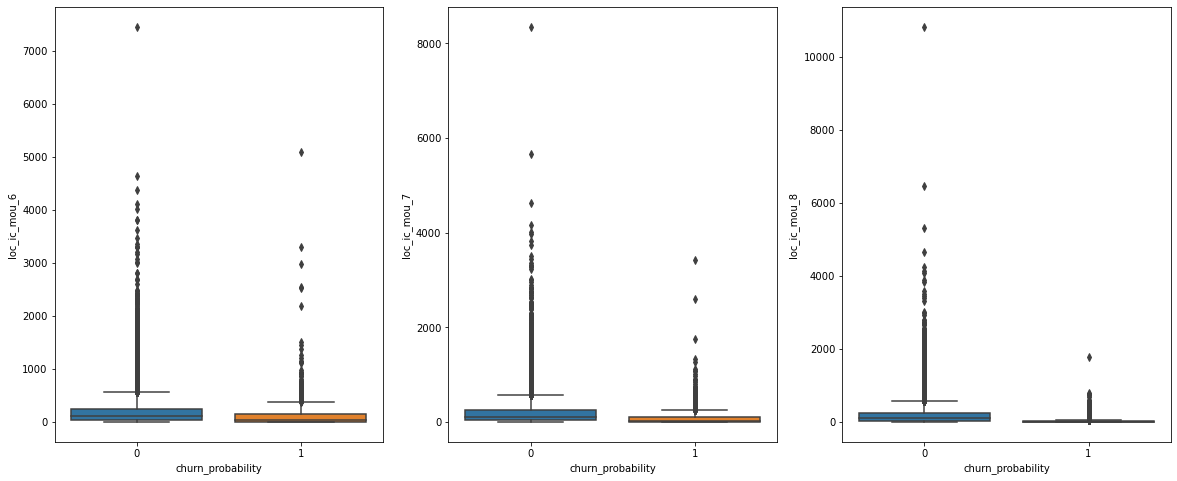

In [52]:
# Plot for local incoming minutes of usage in June, July and August
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.boxplot(data=telecom_train, x='churn_probability', y='loc_ic_mou_6')

plt.subplot(1,3,2)
sns.boxplot(data=telecom_train, x='churn_probability', y='loc_ic_mou_7')

plt.subplot(1,3,3)
sns.boxplot(data=telecom_train, x='churn_probability', y='loc_ic_mou_8')

plt.show()

#### variable : std_ic_mou_6_cols , std_ic_mou_7_cols , std_ic_mou_8_cols

In [53]:
# Verifying the aggregation between different columns related to local outgoing
std_ic_mou_6_cols = ['std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6']
std_ic_mou_7_cols = ['std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7']
std_ic_mou_8_cols = ['std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8']

std_ic_mou_cols = std_ic_mou_6_cols + std_ic_mou_7_cols + std_ic_mou_8_cols

telecom_train['total_std_ic_mou_6'] = telecom_train[std_ic_mou_6_cols].sum(axis=1)
telecom_train['total_std_ic_mou_7'] = telecom_train[std_ic_mou_7_cols].sum(axis=1)
telecom_train['total_std_ic_mou_8'] = telecom_train[std_ic_mou_8_cols].sum(axis=1)

print (len(telecom_train[ (telecom_train['std_ic_mou_6'] - telecom_train['total_std_ic_mou_6']) > 1 ]))
print (len(telecom_train[ (telecom_train['std_ic_mou_7'] - telecom_train['total_std_ic_mou_7']) > 1 ]))
print (len(telecom_train[ (telecom_train['std_ic_mou_8'] - telecom_train['total_std_ic_mou_8']) > 1 ]))

0
0
0


In [54]:
# Since the sum matches with the attributes std_og_mou_6, std_og_mou_7, std_og_mou_8
# we will continue to drop other columns
telecom_train = drop_std_ic_mou_cols(telecom_train)

In [55]:
# Drop derived total columns
derived_total_std_ic_cols = ['total_std_ic_mou_6', 'total_std_ic_mou_7', 'total_std_ic_mou_8']
telecom_train.drop(columns=derived_total_std_ic_cols, axis=1, inplace=True)

print (telecom_train.shape)

(20583, 88)


#### variable : onnet_mou_6 ,onnet_mou_7 , onnet_mou_8

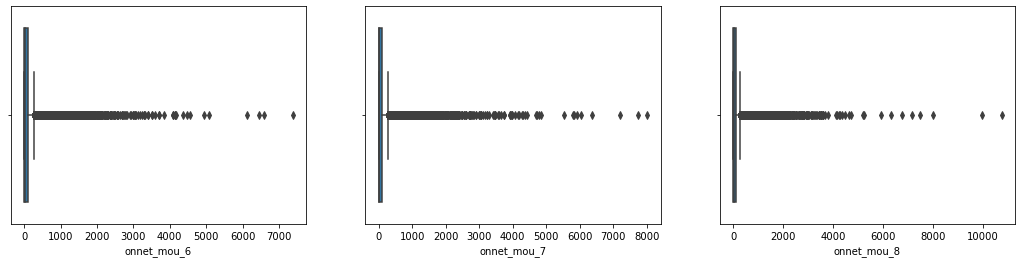

In [56]:
# Inspecting the onnet
onnet_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.boxplot(telecom_train['onnet_mou_6'])

plt.subplot(1,3,2)
sns.boxplot(telecom_train['onnet_mou_7'])

plt.subplot(1,3,3)
sns.boxplot(telecom_train['onnet_mou_8'])
plt.show()

In [57]:
# telecom_train[onnet_cols]
telecom_train[onnet_cols].describe([0.35, 0.55, 0.75, 0.95, 0.99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,20583.000000,20583.000000,20583.000000
mean,129.353488,135.609847,132.175462
std,314.313088,346.655443,351.287638
min,0.000000,0.000000,0.000000
35%,8.687000,8.440000,7.954000
50%,26.740000,25.810000,24.930000
55%,35.792000,35.110000,33.630000
75%,112.605000,112.240000,106.960000
95%,591.980000,639.088000,621.222000
99%,1507.276800,1646.744200,1561.604400


In [58]:
# Removing outliers : filtering users more than 99% quantile range
len(telecom_train[ telecom_train['onnet_mou_6'] > telecom_train['onnet_mou_6'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['onnet_mou_6'] <= telecom_train['onnet_mou_6'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['onnet_mou_7'] > telecom_train['onnet_mou_7'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['onnet_mou_7'] <= telecom_train['onnet_mou_7'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['onnet_mou_8'] > telecom_train['onnet_mou_8'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['onnet_mou_8'] <= telecom_train['onnet_mou_8'].quantile(0.99)]
print (telecom_train.shape)

(20377, 88)
(20173, 88)
(19971, 88)


#### variable : offnet_mou_6 ,offnet_mou_7 , offnet_mou_8

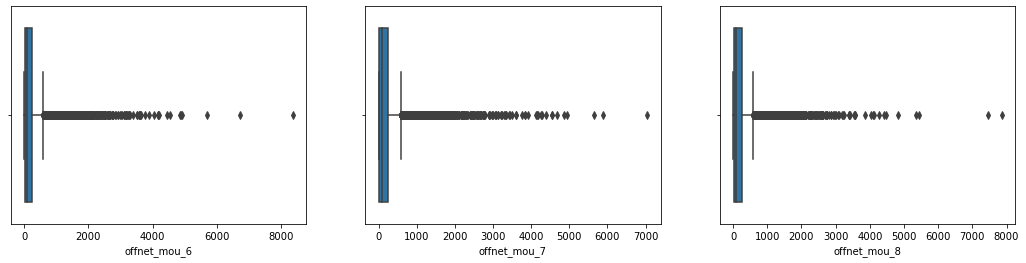

In [59]:
# Inspecting the offnet
offnet_cols = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.boxplot(telecom_train['offnet_mou_6'])

plt.subplot(1,3,2)
sns.boxplot(telecom_train['offnet_mou_7'])

plt.subplot(1,3,3)
sns.boxplot(telecom_train['offnet_mou_8'])
plt.show()

In [60]:
# telecom_train[offnet_cols]
telecom_train[offnet_cols].describe([0.35, 0.55, 0.75, 0.95, 0.99])

,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,19971.000000,19971.000000,19971.000000
mean,203.056175,204.329044,199.761214
std,343.007638,345.805316,336.468217
min,0.000000,0.000000,0.000000
35%,40.475000,39.290000,36.900000
50%,89.430000,86.590000,83.990000
55%,111.520000,107.935000,105.670000
75%,250.415000,248.160000,247.120000
95%,758.015000,785.960000,779.750000
99%,1630.599000,1606.694000,1591.840000


In [61]:
# Removing outliers : filtering users more than 99% quantile range
len(telecom_train[ telecom_train['offnet_mou_6'] > telecom_train['offnet_mou_6'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['offnet_mou_6'] <= telecom_train['offnet_mou_6'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['offnet_mou_7'] > telecom_train['offnet_mou_7'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['offnet_mou_7'] <= telecom_train['offnet_mou_7'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['offnet_mou_8'] > telecom_train['offnet_mou_8'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['offnet_mou_8'] <= telecom_train['offnet_mou_8'].quantile(0.99)]
print (telecom_train.shape)

(19771, 88)
(19573, 88)
(19377, 88)


#### variable : vol_2g_mb_6 ,vol_2g_mb_7 , vol_2g_mb_8

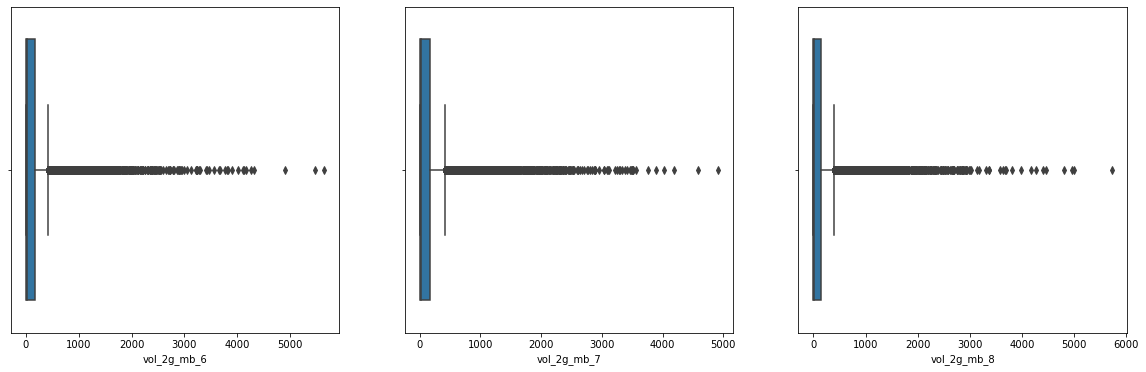

In [62]:
# plot for vol_2g_mb against churn_probability
vol_2g_cols = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(data=telecom_train, x="vol_2g_mb_6", hue="churn_probability")

plt.subplot(1,3,2)
sns.boxplot(data=telecom_train, x="vol_2g_mb_7", hue="churn_probability")

plt.subplot(1,3,3)
sns.boxplot(data=telecom_train, x="vol_2g_mb_8", hue="churn_probability")
plt.show()

In [63]:
#telecom_train[vol_2g_cols]
telecom_train[vol_2g_cols].describe([0.35, 0.55, 0.75, 0.95, 0.99])

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
count,19377.000000,19377.000000,19377.000000
mean,164.931298,164.424713,160.496452
std,345.419807,342.410224,345.196860
min,0.000000,0.000000,0.000000
35%,0.286000,0.710000,0.850000
50%,18.230000,18.830000,18.000000
55%,30.660000,30.716000,29.558000
75%,170.360000,168.610000,155.020000
95%,806.210000,805.524000,804.594000
99%,1608.952400,1676.750800,1628.751600


In [64]:
# Removing outliers : filtering users more than 99% quantile range
len(telecom_train[ telecom_train['vol_2g_mb_6'] > telecom_train['vol_2g_mb_6'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['vol_2g_mb_6'] <= telecom_train['vol_2g_mb_6'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['vol_2g_mb_7'] > telecom_train['vol_2g_mb_7'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['vol_2g_mb_7'] <= telecom_train['vol_2g_mb_7'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['vol_2g_mb_8'] > telecom_train['vol_2g_mb_8'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['vol_2g_mb_8'] <= telecom_train['vol_2g_mb_8'].quantile(0.99)]
print (telecom_train.shape)

(19183, 88)
(18991, 88)
(18801, 88)


#### variable : vol_3g_mb_6 ,vol_3g_mb_7 , vol_3g_mb_8

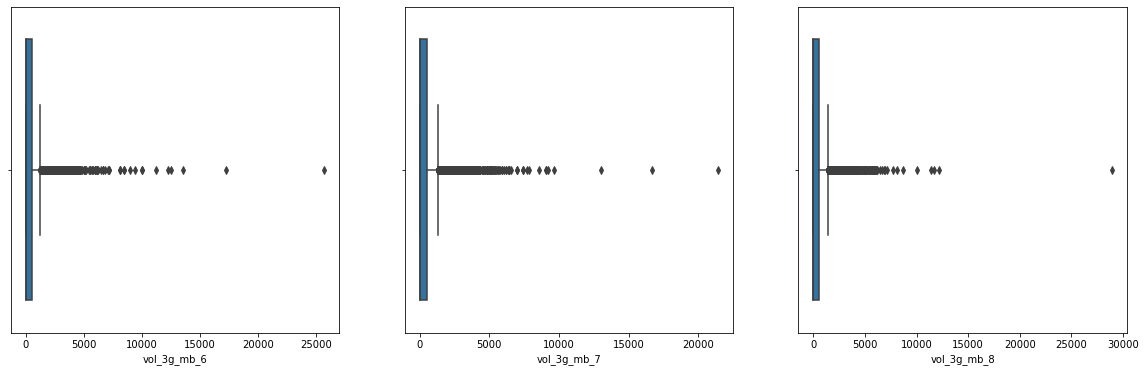

In [65]:
# plot for vol_3g_mb against churn_probability
vol_3g_cols = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(data=telecom_train, x="vol_3g_mb_6", hue="churn_probability")

plt.subplot(1,3,2)
sns.boxplot(data=telecom_train, x="vol_3g_mb_7", hue="churn_probability")

plt.subplot(1,3,3)
sns.boxplot(data=telecom_train, x="vol_3g_mb_8", hue="churn_probability")
plt.show()

In [66]:
# telecom_train[vol_3g_cols]
telecom_train[vol_3g_cols].describe([0.35, 0.55, 0.75, 0.95, 0.99])

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,18801.000000,18801.000000,18801.000000
mean,361.490069,378.654494,399.338069
std,728.307793,714.762386,733.746230
min,0.000000,0.000000,0.000000
35%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.090000
55%,7.090000,57.750000,100.280000
75%,510.010000,534.550000,581.040000
95%,1607.230000,1658.560000,1684.380000
99%,2993.750000,3029.950000,3151.150000


In [67]:
# Removing outliers : filtering users more than 99% quantile range
len(telecom_train[ telecom_train['vol_3g_mb_6'] > telecom_train['vol_3g_mb_6'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['vol_3g_mb_6'] <= telecom_train['vol_3g_mb_6'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['vol_3g_mb_7'] > telecom_train['vol_3g_mb_7'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['vol_3g_mb_7'] <= telecom_train['vol_3g_mb_7'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['vol_3g_mb_8'] > telecom_train['vol_3g_mb_8'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['vol_3g_mb_8'] <= telecom_train['vol_3g_mb_8'].quantile(0.99)]
print (telecom_train.shape)

(18613, 88)
(18426, 88)
(18241, 88)


In [68]:
# Aggregating the 2g and 3g data usage for each month
telecom_train = calc_vol_mb(telecom_train)

In [69]:
# Mean data usage in June, July and Aug
vol_mb_cols = ['vol_mb_6', 'vol_mb_7', 'vol_mb_8']
df_vol_mb = telecom_train.groupby('churn_probability')[vol_mb_cols].mean()
df_vol_mb

,vol_mb_6,vol_mb_7,vol_mb_8
churn_probability,,,
0,439.221400,455.800401,485.056394
1,447.602769,309.036305,128.944989


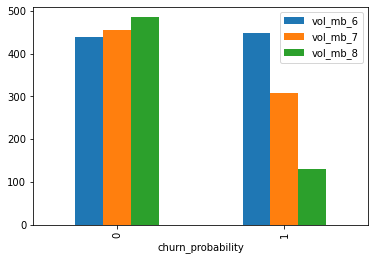

In [70]:
# Visualizing the amount of data usage
df_vol_mb.plot(kind="bar")
plt.show()

**We can clearly see that the amount of data usage is decreasing for churned customers while it is the reverse in case of non-churn customers.**

In [71]:
# Dropping vol_*g_* columns
telecom_train = drop_vol_g_cols(telecom_train)

#### variable : sachet_2g_6 ,sachet_2g_7 , sachet_2g_8

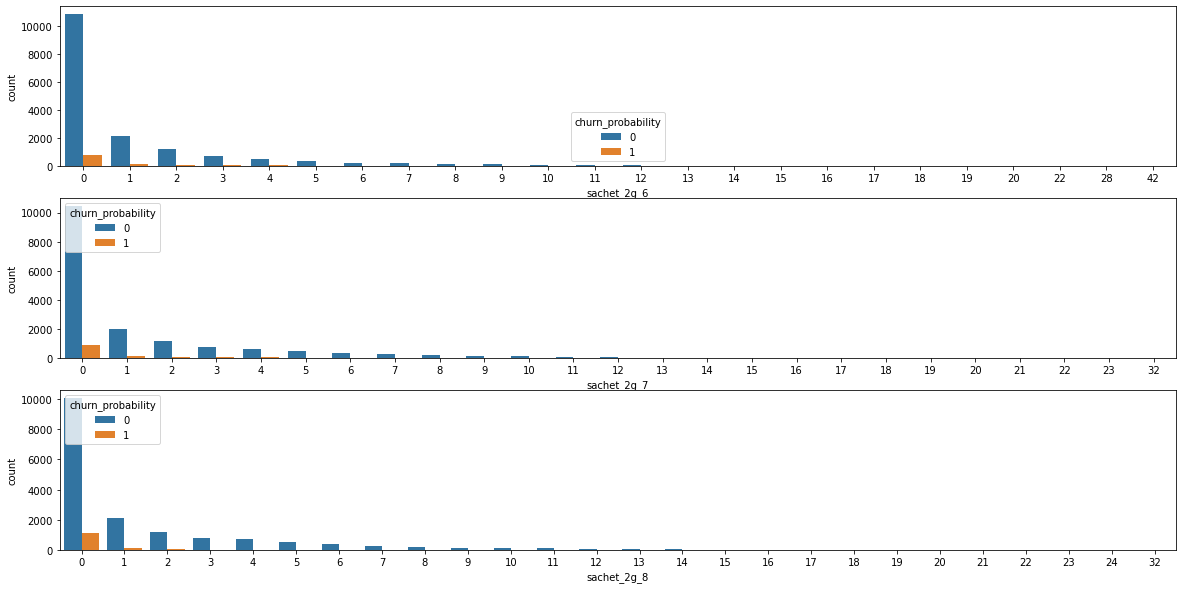

In [72]:
# plot for sachet_2g against churn_probability
sachet_2g_cols = ['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']
plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
sns.countplot(data=telecom_train, x="sachet_2g_6", hue="churn_probability")

plt.subplot(3,1,2)
sns.countplot(data=telecom_train, x="sachet_2g_7", hue="churn_probability")

plt.subplot(3,1,3)
sns.countplot(data=telecom_train, x="sachet_2g_8", hue="churn_probability")
plt.show()

#### variable : sachet_3g_6 ,sachet_3g_7 , sachet_3g_8

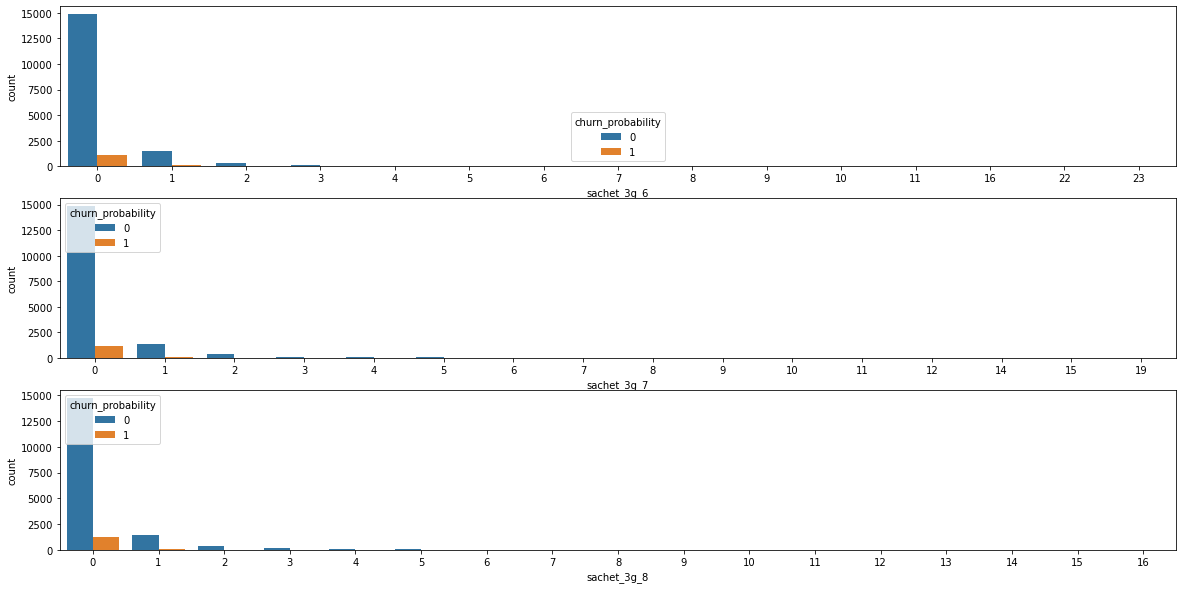

In [73]:
# plot for sachet_3g against churn_probability
sachet_3g_cols = ['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
sns.countplot(data=telecom_train, x="sachet_3g_6", hue="churn_probability")

plt.subplot(3,1,2)
sns.countplot(data=telecom_train, x="sachet_3g_7", hue="churn_probability")

plt.subplot(3,1,3)
sns.countplot(data=telecom_train, x="sachet_3g_8", hue="churn_probability")
plt.show()

In [74]:
# Aggregating the 2g and 3g sachets for each month
telecom_train = calc_sachet(telecom_train)

In [75]:
# Total number of sachets subscribed in June, July and Aug
sachet_cols = ['sachet_6', 'sachet_7', 'sachet_8']
df_sachet = telecom_train.groupby('churn_probability')[sachet_cols].sum()
df_sachet

,sachet_6,sachet_7,sachet_8
churn_probability,,,
0,23185,26997,28525
1,2296,1772,566


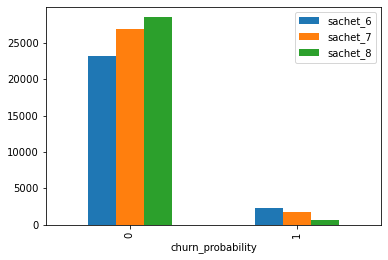

In [76]:
# Visualizing the number of sachets for each month
df_sachet.plot(kind="bar")
plt.show()

**Churned customers have subscribed to very less sachets in the months of June, July and August**

In [77]:
# Dropping sachet_*g_* columns
telecom_train = drop_sachet_g_cols(telecom_train)

#### variable : monthly_2g_6 ,monthly_2g_7 , monthly_2g_8

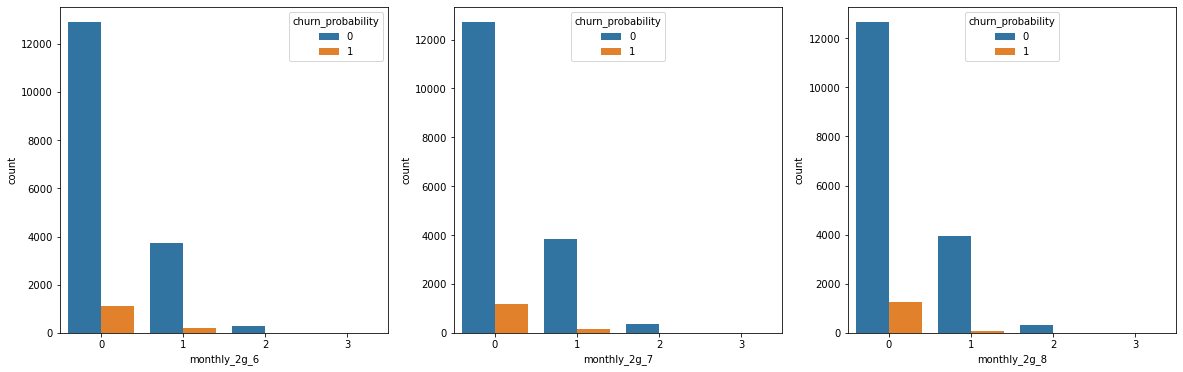

In [78]:
# plot for monthly_2g against churn_probability
monthly_2g_cols = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.countplot(data=telecom_train, x="monthly_2g_6", hue="churn_probability")

plt.subplot(1,3,2)
sns.countplot(data=telecom_train, x="monthly_2g_7", hue="churn_probability")

plt.subplot(1,3,3)
sns.countplot(data=telecom_train, x="monthly_2g_8", hue="churn_probability")
plt.show()

#### variable : monthly_3g_6 ,monthly_3g_7 , monthly_3g_8

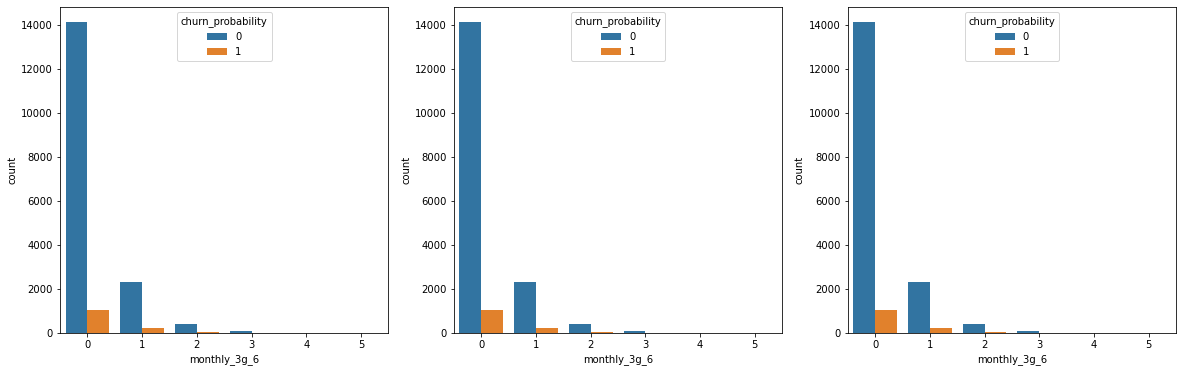

In [79]:
# plot for monthly_3g against churn_probability
monthly_3g_cols = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.countplot(data=telecom_train, x="monthly_3g_6", hue="churn_probability")

plt.subplot(1,3,2)
sns.countplot(data=telecom_train, x="monthly_3g_6", hue="churn_probability")

plt.subplot(1,3,3)
sns.countplot(data=telecom_train, x="monthly_3g_6", hue="churn_probability")
plt.show()

In [80]:
# Deriving monthly_6, monthly_7 and monthly_8 which will signify
# total monthly service schemes taken by that customer in the monthls of June, July and August, respectively
telecom_train = calc_monthly_packs(telecom_train)

In [81]:
# Total number of monthly service schemes subscribed in June, July and Aug
monthly_cols = ['monthly_6', 'monthly_7', 'monthly_8']
df_monthly = telecom_train.groupby('churn_probability')[monthly_cols].mean()
df_monthly

,monthly_6,monthly_7,monthly_8
churn_probability,,,
0,0.454529,0.474219,0.499645
1,0.422122,0.310760,0.158766


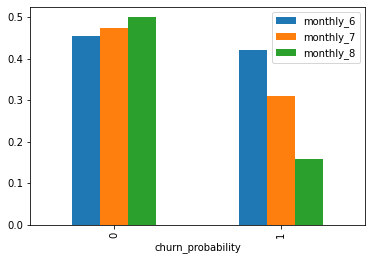

In [82]:
# Visualizing the number of monthly service schemes for each month
df_monthly.plot(kind="bar")
plt.show()

**We can see significant drop in the monthly subscription by churned customers**

In [83]:
# Dropping monthly_*g_* columns
telecom_train = drop_monthly_g_cols(telecom_train)

#### variable : aon

In [84]:
# Checking the stats for aon
telecom_train['aon'].describe()

count    18241.000000
mean      1194.865797
std        960.013801
min        180.000000
25%        440.000000
50%        821.000000
75%       1785.000000
max       4299.000000
Name: aon, dtype: float64

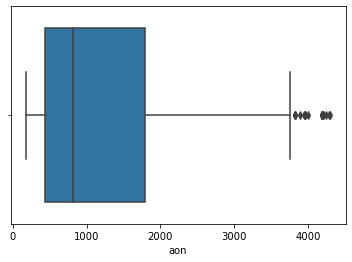

In [85]:
# Visualizing aon
sns.boxplot(telecom_train['aon'])
plt.show()

churn_probability
0    1224.210383
1     821.445448
Name: aon, dtype: float64


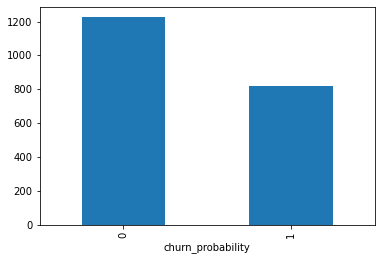

In [86]:
# Visualizing the mean of aon under each category of churn / not-churn
df_aon = telecom_train.groupby("churn_probability")['aon'].mean()
print (df_aon)

# Visualizing using plot
df_aon.plot(kind="bar")
plt.show()

**On an average the churned customers spend less number of days on the operator**

#### variable : jun_vbc_3g, jul_vbc_3g, aug_vbc_3g

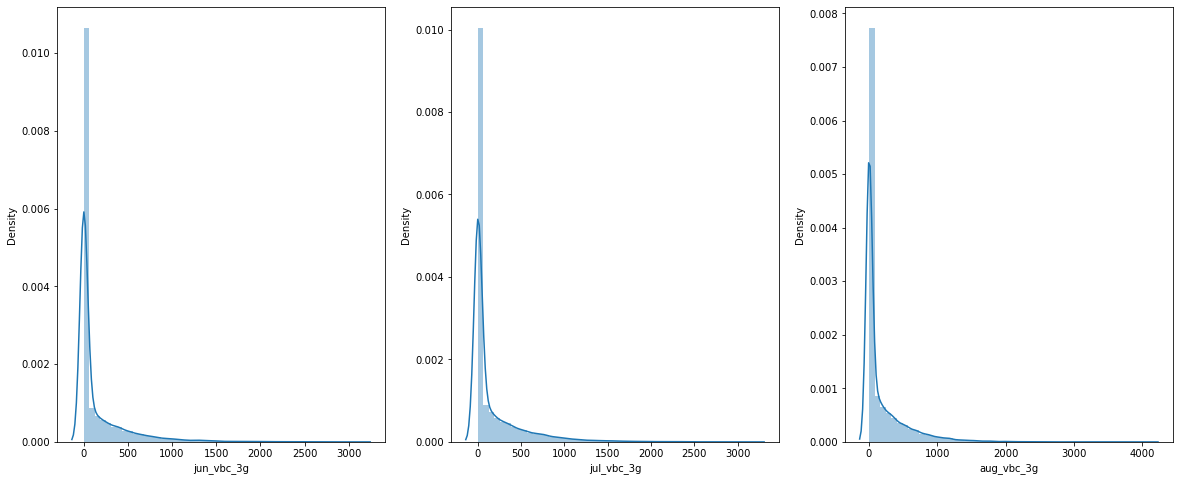

In [87]:
# Visualizing volume based cost
vbc_cols = ['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g']

plt.figure(figsize=(20, 8))

plt.subplot(1,3,1)
sns.distplot(telecom_train['jun_vbc_3g'])

plt.subplot(1,3,2)
sns.distplot(telecom_train['jul_vbc_3g'])

plt.subplot(1,3,3)
sns.distplot(telecom_train['aug_vbc_3g'])
plt.show()

In [88]:
# The plots above are skewed, Most of the values are 0, We will drop the 3 columns
telecom_train = drop_vbc_cols(telecom_train)

#### variable : roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8

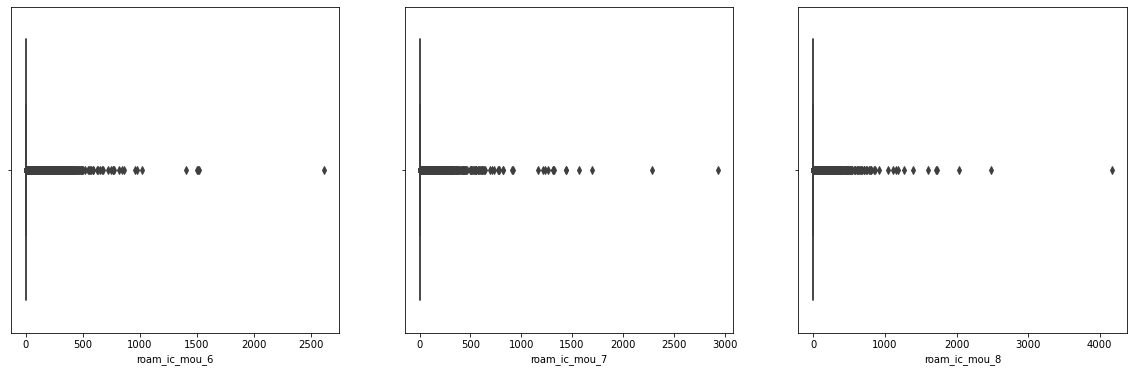

In [89]:
# Visualizing roam_ic_mou_* variables
roam_ic_mou_cols = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8']

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(telecom_train['roam_ic_mou_6'])

plt.subplot(1,3,2)
sns.boxplot(telecom_train['roam_ic_mou_7'])

plt.subplot(1,3,3)
sns.boxplot(telecom_train['roam_ic_mou_8'])
plt.show()

In [90]:
# telecom_train[roam_ic_mou_cols]
telecom_train[roam_ic_mou_cols].describe([0.33, 0.55, 0.75, 0.90, 0.99])

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
count,18241.000000,18241.000000,18241.000000
mean,9.611378,7.873398,8.221141
std,53.451184,58.969286,64.621371
min,0.000000,0.000000,0.000000
33%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
55%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,11.360000,3.380000,4.410000
99%,218.702000,179.372000,193.600000


In [91]:
# Removing outliers : filtering users more than 99% quantile range
len(telecom_train[ telecom_train['roam_ic_mou_6'] > telecom_train['roam_ic_mou_6'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['roam_ic_mou_6'] <= telecom_train['roam_ic_mou_6'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['roam_ic_mou_7'] > telecom_train['roam_ic_mou_7'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['roam_ic_mou_7'] <= telecom_train['roam_ic_mou_7'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['roam_ic_mou_8'] > telecom_train['roam_ic_mou_8'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['roam_ic_mou_8'] <= telecom_train['roam_ic_mou_8'].quantile(0.99)]
print (telecom_train.shape)

(18058, 76)
(17877, 76)
(17698, 76)


#### variable : ic_mou_cols_6, ic_mou_cols_7, ic_mou_cols_9

In [92]:
# Incoming mou for june, july and aug
ic_mou_cols_6 = [
    'loc_ic_mou_6', 
    'std_ic_mou_6',  
    'spl_ic_mou_6', 
    'isd_ic_mou_6', 
    'ic_others_6'
]

ic_mou_cols_7 = [
    'loc_ic_mou_7', 
    'std_ic_mou_7',  
    'spl_ic_mou_7', 
    'isd_ic_mou_7', 
    'ic_others_7'
]

ic_mou_cols_8 = [
    'loc_ic_mou_8', 
    'std_ic_mou_8',  
    'spl_ic_mou_8', 
    'isd_ic_mou_8', 
    'ic_others_8'
]

In [93]:
# Verifying the aggregate of all incoming_mou columns with total_ic_mou_6
telecom_train['calc_tot_ic_mou'] = telecom_train[ic_mou_cols_6].sum(axis=1)
telecom_train['diff_tot_ic_mou'] = telecom_train['total_ic_mou_6'] - telecom_train['calc_tot_ic_mou']
derived_ic_mou_cols = ['calc_tot_ic_mou', 'diff_tot_ic_mou']

print (len(telecom_train[ telecom_train['diff_tot_ic_mou'] > 1][ic_mou_cols_6 + derived_ic_mou_cols + ['total_ic_mou_6']]))

0


In [94]:
# Verifying the aggregate of all incoming_mou columns with total_ic_mou_7
telecom_train['calc_tot_ic_mou'] = telecom_train[ic_mou_cols_7].sum(axis=1)
telecom_train['diff_tot_ic_mou'] = telecom_train['total_ic_mou_7'] - telecom_train['calc_tot_ic_mou']
derived_ic_mou_cols = ['calc_tot_ic_mou', 'diff_tot_ic_mou']

print (len(telecom_train[ telecom_train['diff_tot_ic_mou'] > 1][ic_mou_cols_7 + derived_ic_mou_cols + ['total_ic_mou_7']]))

0


In [95]:
# Verifying the aggregate of all incoming_mou columns with total_ic_mou_8
telecom_train['calc_tot_ic_mou'] = telecom_train[ic_mou_cols_8].sum(axis=1)
telecom_train['diff_tot_ic_mou'] = telecom_train['total_ic_mou_8'] - telecom_train['calc_tot_ic_mou']
derived_ic_mou_cols = ['calc_tot_ic_mou', 'diff_tot_ic_mou']

print (len(telecom_train[ telecom_train['diff_tot_ic_mou'] > 1][ic_mou_cols_8 + derived_ic_mou_cols + ['total_ic_mou_8']]))

0


In [96]:
# Dropping the derived columns in the above step
telecom_train.drop(columns=derived_ic_mou_cols, inplace=True)

In [97]:
# Dropping the ic_mou_cols_6 in the above step
telecom_train = drop_ic_mou_cols(telecom_train)

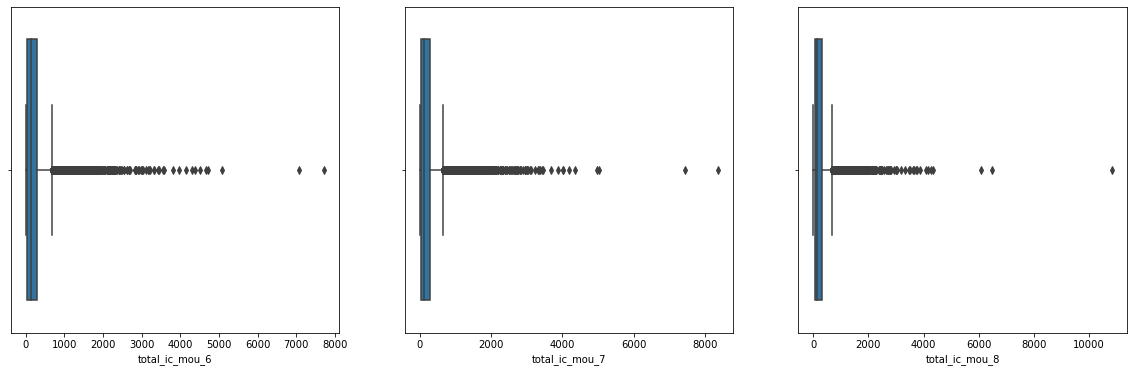

In [98]:
# Visualizing total_ic_mou_6, total_ic_mou_7, total_ic_mou_8
total_ic_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(telecom_train['total_ic_mou_6'])

plt.subplot(1,3,2)
sns.boxplot(telecom_train['total_ic_mou_7'])

plt.subplot(1,3,3)
sns.boxplot(telecom_train['total_ic_mou_8'])
plt.show()

In [99]:
# telecom_train[total_ic_mou_cols]
telecom_train[total_ic_mou_cols].describe([0.33, 0.55, 0.75, 0.90, 0.95, 0.99])

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,17698.000000,17698.000000,17698.000000
mean,230.763009,231.489155,230.338711
std,328.147278,328.489885,326.399755
min,0.000000,0.000000,0.000000
33%,68.360700,69.340000,67.640000
50%,132.790000,134.220000,134.575000
55%,156.157500,156.917000,157.610000
75%,295.255000,290.295000,296.475000
90%,548.895000,545.821000,545.825000
95%,768.803500,781.530500,778.152500


In [100]:
# Removing outliers : filtering users more than 99% quantile range
len(telecom_train[ telecom_train['total_ic_mou_6'] > telecom_train['total_ic_mou_6'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['total_ic_mou_6'] <= telecom_train['total_ic_mou_6'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['total_ic_mou_7'] > telecom_train['total_ic_mou_7'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['total_ic_mou_7'] <= telecom_train['total_ic_mou_7'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['total_ic_mou_8'] > telecom_train['total_ic_mou_8'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['total_ic_mou_8'] <= telecom_train['total_ic_mou_8'].quantile(0.99)]
print (telecom_train.shape)

(17521, 61)
(17345, 61)
(17171, 61)


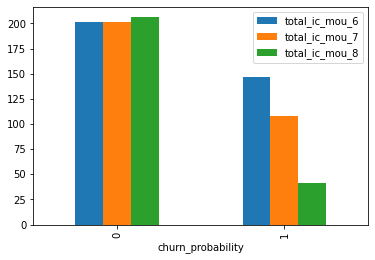

In [101]:
# Visualizing total_ic_mou for all months
telecom_train.groupby('churn_probability')[total_ic_mou_cols].mean().plot(kind="bar")
plt.show()

**Plot shows decline in the total incoming mou for churn customers**

#### variable : og_mou_cols_6, og_mou_cols_7, og_mou_cols_9

In [102]:
# Inspecting outgoing calls
telecom_train = telecom_train.eval("m6 = loc_og_mou_6+std_og_mou_6+isd_og_mou_6+spl_og_mou_6+og_others_6")
telecom_train = telecom_train.round(2)
telecom_train['diff_m6'] = telecom_train['total_og_mou_6'] - telecom_train['m6']
#print(telecom_train['diff_m6'].value_counts())
print(telecom_train['diff_m6'].min(),telecom_train['diff_m6'].max())

telecom_train = telecom_train.eval("m7 = loc_og_mou_7+std_og_mou_7+isd_og_mou_7+spl_og_mou_7+og_others_7")
telecom_train = telecom_train.round(2)
telecom_train['diff_m7'] = telecom_train['total_og_mou_7'] - telecom_train['m7']
#print(telecom_train['diff_m7'].value_counts())
print(telecom_train['diff_m7'].min(),telecom_train['diff_m7'].max())

telecom_train = telecom_train.eval("m8 = loc_og_mou_8+std_og_mou_8+isd_og_mou_8+spl_og_mou_8+og_others_8")
telecom_train = telecom_train.round(2)
telecom_train['diff_m8'] = telecom_train['total_og_mou_8'] - telecom_train['m8']
#print(telecom_train['diff_m8'].value_counts())
print(telecom_train['diff_m8'].min(),telecom_train['diff_m8'].max())

print(telecom_train['total_og_mou_6'].sum()-telecom_train['m6'].sum())
print(telecom_train['total_og_mou_7'].sum()-telecom_train['m7'].sum())
print(telecom_train['total_og_mou_8'].sum()-telecom_train['m8'].sum())

telecom_train = telecom_train.drop(['m6', 'diff_m6','m7', 'diff_m7','m8', 'diff_m8'],axis = 1)

telecom_train = drop_og_mou_cols(telecom_train)

0.0 0.03999999999999204
0.0 0.03000000000002956
0.0 0.030000000000086402
116.27999999979511
103.61000000033528
103.08999999938533


,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,17171.000000,17171.000000,17171.000000
mean,242.449003,239.856716,234.395657
std,310.595819,301.773587,294.671254
min,0.000000,0.000000,0.000000
35%,52.640000,51.285000,48.890000
50%,121.230000,118.860000,117.860000
55%,152.700000,149.335000,147.050000
75%,349.695000,349.470000,344.245000
95%,878.850000,873.850000,870.535000
99%,1381.313000,1303.439000,1250.180000


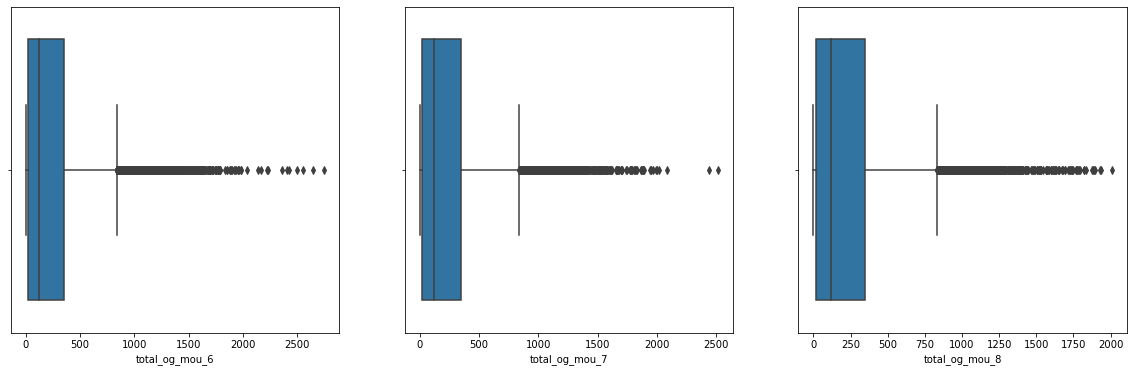

In [103]:
# plot for total_og_mou_ against churn_probability
total_og_cols = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
display(telecom_train[total_og_cols].describe([0.35, 0.55, 0.75, 0.95, 0.99]))

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(data=telecom_train, x="total_og_mou_6", hue="churn_probability")

plt.subplot(1,3,2)
sns.boxplot(data=telecom_train, x="total_og_mou_7", hue="churn_probability")

plt.subplot(1,3,3)
sns.boxplot(data=telecom_train, x="total_og_mou_8", hue="churn_probability")
plt.show()

In [104]:
# Removing outliers : filtering users more than 99% quantile range
len(telecom_train[ telecom_train['total_og_mou_6'] > telecom_train['total_og_mou_6'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['total_og_mou_6'] <= telecom_train['total_og_mou_6'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['total_og_mou_7'] > telecom_train['total_og_mou_7'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['total_og_mou_7'] <= telecom_train['total_og_mou_7'].quantile(0.99)]
print (telecom_train.shape)

len(telecom_train[ telecom_train['total_og_mou_8'] > telecom_train['total_og_mou_8'].quantile(0.99) ])
telecom_train = telecom_train[ telecom_train['total_og_mou_8'] <= telecom_train['total_og_mou_8'].quantile(0.99)]
print (telecom_train.shape)

(16999, 46)
(16829, 46)
(16660, 46)


In [105]:
print (telecom_train.shape)

(16660, 46)


## <a id="id5">EDA on Test dataset</a>

In [106]:
# Dropping duplicate rows if any
telecom_test.drop_duplicates(inplace=True)

# Dropping rows with all NaN values
telecom_test.dropna(axis=0, how='all', inplace=True)

# Dropping circle_id column as it contains only single circle
telecom_test.drop(columns=['circle_id'], inplace=True)

# Dropping the columns containing only single unique value
#telecom_test = drop_last_date_of_month_cols(telecom_test)

# The null values in the date columns might signify that the customer hasn't recharged in that particular month
# Also, the date of recharge in each month is not a significant factor in identifying whether a customer will churn
# Since the customers can have 3 months recharge plan as well.
# We will drop the date columns
#telecom_test = drop_date_attributes(telecom_test)


# calculating difference in dates
telecom_test['diff_days_1_rech'] = abs(pd.to_datetime(telecom_test['date_of_last_rech_6']) - pd.to_datetime(telecom_test['date_of_last_rech_7']))
telecom_test['diff_days_1_rech'] =telecom_test['diff_days_1_rech']/np.timedelta64(1,'D')

telecom_test['diff_days_2_rech'] = abs(pd.to_datetime(telecom_test['date_of_last_rech_7']) - pd.to_datetime(telecom_test['date_of_last_rech_8']))
telecom_test['diff_days_2_rech'] =telecom_test['diff_days_2_rech']/np.timedelta64(1,'D')

telecom_test['diff_days_1_rech_data'] = abs(pd.to_datetime(telecom_test['date_of_last_rech_data_6']) - pd.to_datetime(telecom_test['date_of_last_rech_data_7']))
telecom_test['diff_days_1_rech_data'] =telecom_test['diff_days_1_rech_data']/np.timedelta64(1,'D')

telecom_test['diff_days_2_rech_data'] = abs(pd.to_datetime(telecom_test['date_of_last_rech_data_7']) - pd.to_datetime(telecom_test['date_of_last_rech_data_8']))
telecom_test['diff_days_2_rech_data'] =telecom_test['diff_days_2_rech_data']/np.timedelta64(1,'D')

telecom_test = telecom_test.fillna(0)

print('diff_days_1_rech:',telecom_test['diff_days_1_rech'].min(),telecom_test['diff_days_1_rech'].max())
print('diff_days_2_rech:',telecom_test['diff_days_2_rech'].min(),telecom_test['diff_days_2_rech'].max())
print('diff_days_1_rech_data:',telecom_test['diff_days_1_rech_data'].min(),telecom_test['diff_days_1_rech_data'].max())
print('diff_days_2_rech_data:',telecom_test['diff_days_2_rech_data'].min(),telecom_test['diff_days_2_rech_data'].max())

telecom_test = telecom_test.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                                  'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','date_of_last_rech_data_6', 
                'date_of_last_rech_data_7','date_of_last_rech_data_8'],axis = 1)
print(telecom_test.shape)
telecom_test.head(2)



# Dropping columns related to count and max_rech
telecom_test = drop_count_and_max_rech_attributes(telecom_test)

# Imputing the values for total_rech_data and av_rech_amt_data with 0 for NaN assuming that no recharge was done
telecom_test = impute_rech_cols(telecom_test)

# Derving total recharge amount per user per month
# Total recharge amount per month = Total data recharge + Total amount recharge
# Total data recharge can be calculated using the attributes total_rech_data and av_rech_amt_data
# Total data recharge = Total recharge data * Average recharge amount for data
telecom_test = calc_total_data_rech(telecom_test)

# Computing the value of total recharge done by the user per month
# Total recharge amount per month = Total data recharge + Total amount recharge
telecom_test = calc_total_amt_rech(telecom_test)

# Dropping the original columns
telecom_test = drop_rech_cols(telecom_test)

# Since less than 1 % of users use night pack service, we will drop these columns
telecom_test = drop_night_pck_cols(telecom_test)

# Imputing the missing values of fb_user fields with 0 values 
# assuming that missing values means the user isn't using facebook service on that operator
telecom_test = impute_fb_user_cols(telecom_test)

# Dropping the arpu_*g columns since the dataset contains arpu_6, arpu_7, arpu_8 columns
telecom_test = drop_arpu_g_cols(telecom_test)

# Extracting high value customers based on the mean value of total recharge amount 
# in the months of June and July
telecom_test = calc_mean_avg_rech_amt(telecom_test)

# Imputing the missing values for high value customers with 0
telecom_test.fillna(value=0.0, inplace=True)

# Dropping loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
telecom_test = drop_t2o_mou_cols(telecom_test)

# Since the sum of all loc_og_mou matches with the attributes loc_og_mou_6, loc_og_mou_7, loc_og_mou_8
# we will continue to drop other columns
telecom_test = drop_loc_og_mou_cols(telecom_test)

# Since the sum of all std_og_mou matches with the attributes std_og_mou_6, std_og_mou_7, std_og_mou_8
# we will continue to drop other columns
telecom_test = drop_std_og_mou_cols(telecom_test)

# Since the sum of all loc_ic matches with the attributes std_og_mou_6, std_og_mou_7, std_og_mou_8
# we will continue to drop other columns
telecom_test = drop_loc_ic_mou_cols(telecom_test)

# Since the sum of all std_ic matches with the attributes std_og_mou_6, std_og_mou_7, std_og_mou_8
# we will continue to drop other columns
telecom_test = drop_std_ic_mou_cols(telecom_test)

# Aggregating the 2g and 3g data usage for each month
telecom_test = calc_vol_mb(telecom_test)

# Dropping vol_*g_* columns
telecom_test = drop_vol_g_cols(telecom_test)

# Aggregating the 2g and 3g sachets for each month
telecom_test = calc_sachet(telecom_test)

# Dropping sachet_*g_* columns
telecom_test = drop_sachet_g_cols(telecom_test)

# Deriving monthly_6, monthly_7 and monthly_8 which will signify
# total monthly service schemes taken by that customer in the monthls of June, July and August, respectively
telecom_test = calc_monthly_packs(telecom_test)

# Dropping monthly_*g_* columns
telecom_test = drop_monthly_g_cols(telecom_test)

# Dropping the volume based cost columns due to skewness of graph
telecom_test = drop_vbc_cols(telecom_test)

# Dropping the ic_mou_cols_6 in the above step
telecom_test = drop_ic_mou_cols(telecom_test)

# Dropping og_mou cols
telecom_test = drop_og_mou_cols(telecom_test)

print (telecom_test.shape)

diff_days_1_rech: 0.0 60.0
diff_days_2_rech: 0.0 61.0
diff_days_1_rech_data: 0.0 60.0
diff_days_2_rech_data: 0.0 61.0
(30000, 165)
(30000, 46)


### Features correlation

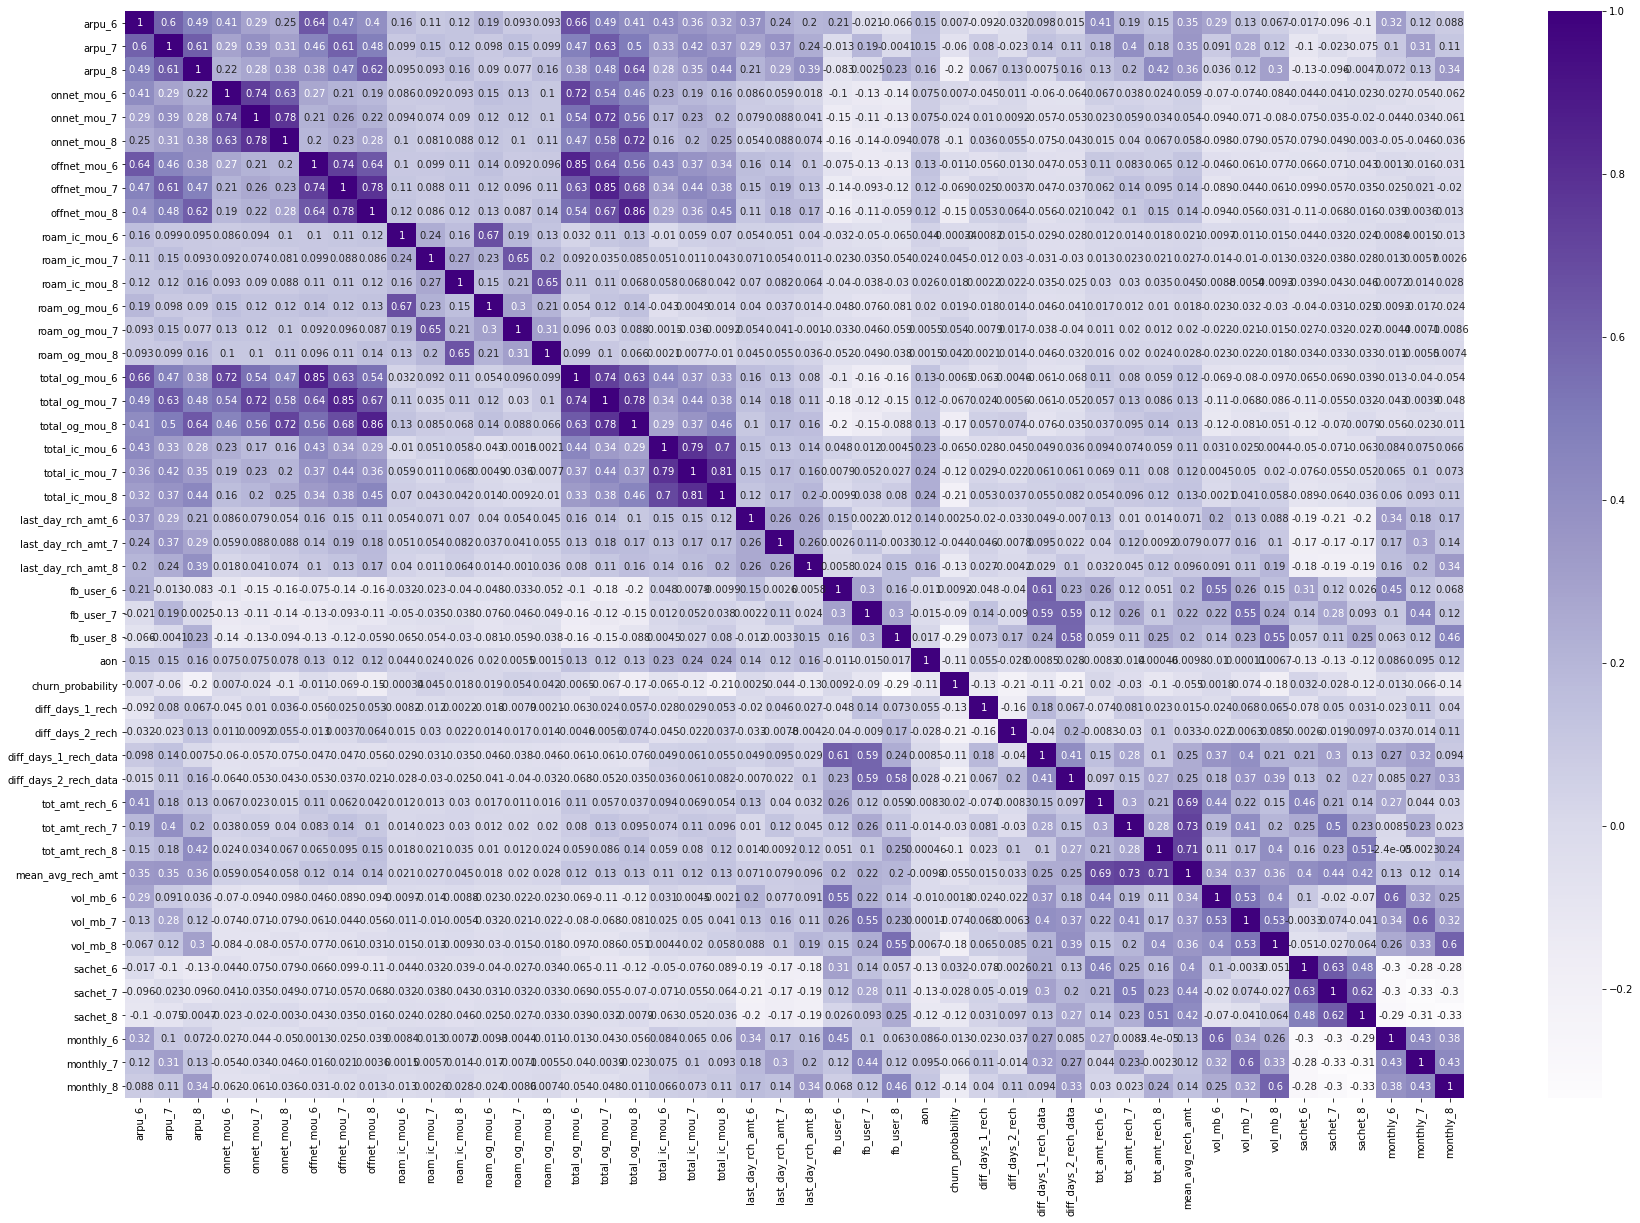

In [107]:
# Plotting heatmap against all features
plt.figure(figsize=(30,20))
sns.heatmap(telecom_train.corr(), annot=True, cmap='Purples')
plt.show()

**From the plot above, we can see few features which are correlated to each other. In the future analysis, we will be dealing with multi-collinearity using VIF.**

## <a id="id6">Feature scaling</a>

In [108]:
# Instantiate
scaler = StandardScaler()

# Fetch all numerical columns
numerical_columns = np.array(telecom_train.drop('churn_probability', axis=1).columns)
print(numerical_columns)

# Scale numerical columns using StandardScaler
telecom_train[numerical_columns] = scaler.fit_transform(telecom_train[numerical_columns])
telecom_test[numerical_columns] = scaler.transform(telecom_test[numerical_columns])

['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8'
 'total_ic_mou_6' 'total_ic_mou_7' 'total_ic_mou_8' 'last_day_rch_amt_6'
 'last_day_rch_amt_7' 'last_day_rch_amt_8' 'fb_user_6' 'fb_user_7'
 'fb_user_8' 'aon' 'diff_days_1_rech' 'diff_days_2_rech'
 'diff_days_1_rech_data' 'diff_days_2_rech_data' 'tot_amt_rech_6'
 'tot_amt_rech_7' 'tot_amt_rech_8' 'mean_avg_rech_amt' 'vol_mb_6'
 'vol_mb_7' 'vol_mb_8' 'sachet_6' 'sachet_7' 'sachet_8' 'monthly_6'
 'monthly_7' 'monthly_8']


## <a id="id7">Split `X` and `y` datasets</a>

In [109]:
# splitting into train & test
X_train = telecom_train
y_train = telecom_train.pop('churn_probability')
X_test = telecom_test.copy()

# Checking the distribution of churn and non-churn customers
y_train.value_counts()

0    15442
1     1218
Name: churn_probability, dtype: int64

**We can see a high class imbalance between both the categories. We will use SMOTE technique to balance the data.**

In [110]:
# Implementing smote
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
  
smote = SMOTE(random_state = 2)
X_train, y_train = smote.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

# Convert to dataframe
y_train = pd.DataFrame(y_train).squeeze()
y_train.head()

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)

Before OverSampling, counts of label '1': 1218
Before OverSampling, counts of label '0': 15442 

After OverSampling, the shape of train_X: (30884, 45)
After OverSampling, the shape of train_y: (30884,) 

After OverSampling, counts of label '1': 15442
After OverSampling, counts of label '0': 15442
(30884, 45)
(30884,)
(30000, 46)


## <a id="id8">Logistic Regression model with RFE</a>

In [111]:
# Logistic regression model
log_m1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
print (log_m1.fit().summary())

# Instantiate
log_reg = LogisticRegression()

# Instantiate RFE to select top 30 features
rfe = RFE(log_reg, 30)

# Evaluate on train set
rfe = rfe.fit(X_train, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30884
Model:                            GLM   Df Residuals:                    30838
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11441.
Date:                Wed, 13 Apr 2022   Deviance:                       22883.
Time:                        17:19:18   Pearson chi2:                 8.48e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.90

In [112]:
# List all columns with RFE score
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

# Top 30 features
columns = X_train.columns[rfe.support_]
print(columns)

# Assessing the model using the required features
X_train_sm = sm.add_constant(X_train[columns])
log_m2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log_m2.fit()
print(res.summary())

Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_6', 'roam_og_mou_7', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'last_day_rch_amt_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon',
       'diff_days_1_rech', 'diff_days_2_rech', 'diff_days_1_rech_data',
       'diff_days_2_rech_data', 'tot_amt_rech_7', 'vol_mb_8', 'sachet_7',
       'sachet_8'],
      dtype='object')
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30884
Model:                            GLM   Df Residuals:                    30853
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IR

In [113]:
# Predict on train dataset
telecom_churn = predict_train_dataset(X_train_sm, y_train, res)
telecom_churn.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0.186624,0,0
1,0,0.392409,1,0
2,0,0.951516,2,1
3,0,0.003169,3,0
4,0,0.135122,4,0


## Metrics

In [114]:
# Creating a dataframe to store metrics against all the models
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

### Metrics using only RFE

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                12913   2529
1                 2452  12990
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.83912


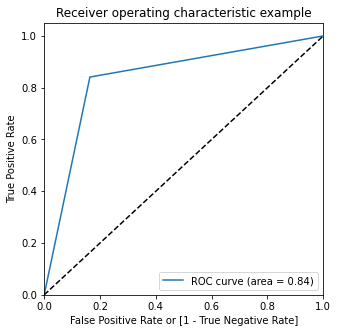

In [115]:
#get metrics
display(get_metrics('Logistic Regression with RFE', telecom_churn))
draw_roc(telecom_churn.actual_churn, telecom_churn.predicted_churn)

### Export test predictions (I)

In [116]:
# export predictions
X_test_sm = sm.add_constant(X_test[columns])
assess_and_export_predictions(X_test, X_test_sm, res, 1)

,id,churn_probability
0,69999,1
1,70000,0
2,70001,1
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,1
29998,99997,1


## <a id="id9">Manual feature elimination using VIF</a>

In [117]:
print (vif_features())

                 Features      VIF
11         total_og_mou_6  2573.55
4            offnet_mou_6  1331.38
12         total_og_mou_7  1116.78
1             onnet_mou_6   763.78
5            offnet_mou_7   548.76
2             onnet_mou_7   334.19
13         total_og_mou_8    54.06
9           roam_og_mou_6    45.18
6            offnet_mou_8    27.81
10          roam_og_mou_7    22.45
3             onnet_mou_8    15.38
15         total_ic_mou_7     4.55
16         total_ic_mou_8     4.15
0                  arpu_8     3.73
20              fb_user_8     3.45
25  diff_days_2_rech_data     3.05
14         total_ic_mou_6     3.04
24  diff_days_1_rech_data     2.84
19              fb_user_7     2.31
28               sachet_7     2.31
27               vol_mb_8     2.25
7           roam_ic_mou_6     2.01
29               sachet_8     1.96
8           roam_ic_mou_7     1.81
18              fb_user_6     1.80
17     last_day_rch_amt_8     1.59
26         tot_amt_rech_7     1.59
23       diff_days_2

In [118]:
X_train_sm,res,columns=build_model(columns, 'total_og_mou_7')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30884
Model:                            GLM   Df Residuals:                    30854
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11510.
Date:                Wed, 13 Apr 2022   Deviance:                       23020.
Time:                        17:19:33   Pearson chi2:                 8.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.88

In [119]:
print (vif_features())

                 Features      VIF
11         total_og_mou_6  2330.74
4            offnet_mou_6  1205.23
1             onnet_mou_6   692.35
12         total_og_mou_8    53.96
9           roam_og_mou_6    40.98
6            offnet_mou_8    27.66
3             onnet_mou_8    15.34
14         total_ic_mou_7     4.53
15         total_ic_mou_8     4.15
5            offnet_mou_7     3.78
0                  arpu_8     3.69
2             onnet_mou_7     3.67
19              fb_user_8     3.45
24  diff_days_2_rech_data     3.05
13         total_ic_mou_6     3.02
23  diff_days_1_rech_data     2.83
27               sachet_7     2.31
18              fb_user_7     2.31
26               vol_mb_8     2.25
7           roam_ic_mou_6     2.01
28               sachet_8     1.96
10          roam_og_mou_7     1.95
8           roam_ic_mou_7     1.80
17              fb_user_6     1.80
25         tot_amt_rech_7     1.59
16     last_day_rch_amt_8     1.59
22       diff_days_2_rech     1.28
20                  

In [120]:
X_train_sm,res,columns=build_model(columns, 'total_og_mou_6')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30884
Model:                            GLM   Df Residuals:                    30855
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11516.
Date:                Wed, 13 Apr 2022   Deviance:                       23032.
Time:                        17:19:37   Pearson chi2:                 8.70e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.88

In [121]:
print (vif_features())

                 Features    VIF
11         total_og_mou_8  53.94
6            offnet_mou_8  27.63
3             onnet_mou_8  15.32
13         total_ic_mou_7   4.53
14         total_ic_mou_8   4.15
5            offnet_mou_7   3.78
2             onnet_mou_7   3.67
0                  arpu_8   3.66
18              fb_user_8   3.45
23  diff_days_2_rech_data   3.05
12         total_ic_mou_6   3.02
22  diff_days_1_rech_data   2.83
1             onnet_mou_6   2.51
4            offnet_mou_6   2.38
26               sachet_7   2.31
17              fb_user_7   2.31
25               vol_mb_8   2.24
9           roam_og_mou_6   2.17
7           roam_ic_mou_6   2.01
27               sachet_8   1.96
10          roam_og_mou_7   1.95
16              fb_user_6   1.80
8           roam_ic_mou_7   1.80
24         tot_amt_rech_7   1.59
15     last_day_rch_amt_8   1.59
21       diff_days_2_rech   1.28
19                    aon   1.22
20       diff_days_1_rech   1.21


In [122]:
X_train_sm,res,columns=build_model(columns, 'total_og_mou_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30884
Model:                            GLM   Df Residuals:                    30856
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11608.
Date:                Wed, 13 Apr 2022   Deviance:                       23216.
Time:                        17:19:42   Pearson chi2:                 8.83e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.88

In [123]:
print (vif_features())

                 Features   VIF
12         total_ic_mou_7  4.52
13         total_ic_mou_8  4.04
6            offnet_mou_8  3.93
5            offnet_mou_7  3.74
2             onnet_mou_7  3.67
0                  arpu_8  3.65
17              fb_user_8  3.45
22  diff_days_2_rech_data  3.05
11         total_ic_mou_6  3.02
21  diff_days_1_rech_data  2.83
3             onnet_mou_8  2.63
1             onnet_mou_6  2.51
4            offnet_mou_6  2.38
25               sachet_7  2.31
16              fb_user_7  2.31
24               vol_mb_8  2.24
9           roam_og_mou_6  2.13
7           roam_ic_mou_6  2.00
26               sachet_8  1.96
10          roam_og_mou_7  1.88
15              fb_user_6  1.80
8           roam_ic_mou_7  1.80
14     last_day_rch_amt_8  1.59
23         tot_amt_rech_7  1.59
20       diff_days_2_rech  1.28
18                    aon  1.22
19       diff_days_1_rech  1.21


In [124]:
X_train_sm,res,columns=build_model(columns, 'offnet_mou_6')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30884
Model:                            GLM   Df Residuals:                    30857
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11609.
Date:                Wed, 13 Apr 2022   Deviance:                       23219.
Time:                        17:19:45   Pearson chi2:                 9.17e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.88

In [125]:
print (vif_features())

                 Features   VIF
11         total_ic_mou_7  4.44
12         total_ic_mou_8  4.03
5            offnet_mou_8  3.92
0                  arpu_8  3.65
2             onnet_mou_7  3.64
16              fb_user_8  3.44
21  diff_days_2_rech_data  3.04
4            offnet_mou_7  2.85
20  diff_days_1_rech_data  2.83
10         total_ic_mou_6  2.66
3             onnet_mou_8  2.63
1             onnet_mou_6  2.44
24               sachet_7  2.31
15              fb_user_7  2.29
23               vol_mb_8  2.24
8           roam_og_mou_6  2.10
6           roam_ic_mou_6  2.00
25               sachet_8  1.96
9           roam_og_mou_7  1.88
7           roam_ic_mou_7  1.80
14              fb_user_6  1.79
22         tot_amt_rech_7  1.59
13     last_day_rch_amt_8  1.59
19       diff_days_2_rech  1.28
17                    aon  1.22
18       diff_days_1_rech  1.21


In [126]:
X_train_sm,res,columns=build_model(columns, 'onnet_mou_6')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30884
Model:                            GLM   Df Residuals:                    30858
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11611.
Date:                Wed, 13 Apr 2022   Deviance:                       23221.
Time:                        17:19:49   Pearson chi2:                 9.27e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.88

In [127]:
X_train_sm,res,columns=build_model(columns, 'roam_og_mou_7')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30884
Model:                            GLM   Df Residuals:                    30859
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11612.
Date:                Wed, 13 Apr 2022   Deviance:                       23225.
Time:                        17:19:49   Pearson chi2:                 9.24e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.88

In [128]:
print (vif_features())

                 Features   VIF
9          total_ic_mou_7  4.38
10         total_ic_mou_8  4.03
4            offnet_mou_8  3.91
0                  arpu_8  3.65
14              fb_user_8  3.43
19  diff_days_2_rech_data  3.04
3            offnet_mou_7  2.84
18  diff_days_1_rech_data  2.83
2             onnet_mou_8  2.62
8          total_ic_mou_6  2.55
1             onnet_mou_7  2.33
22               sachet_7  2.31
13              fb_user_7  2.28
21               vol_mb_8  2.24
23               sachet_8  1.96
7           roam_og_mou_6  1.96
5           roam_ic_mou_6  1.95
12              fb_user_6  1.79
11     last_day_rch_amt_8  1.59
20         tot_amt_rech_7  1.59
17       diff_days_2_rech  1.28
15                    aon  1.22
16       diff_days_1_rech  1.21
6           roam_ic_mou_7  1.11


### Predict on train set after RFE and manual elimination

In [129]:
# Predict on train dataset
telecom_churn_2 = predict_train_dataset(X_train_sm, y_train, res)
telecom_churn.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0.186624,0,0
1,0,0.392409,1,0
2,0,0.951516,2,1
3,0,0.003169,3,0
4,0,0.135122,4,0


### Metrics using RFE + manual elimination

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                12841   2601
1                 2483  12959
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011


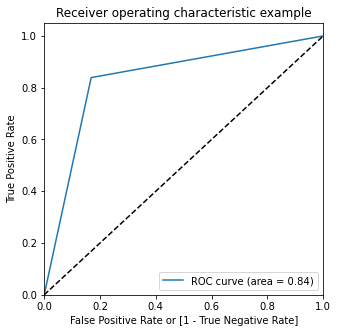

In [130]:
# Get metrics
display(get_metrics('Logistic Regression (RFE) + manual tuning', telecom_churn_2))
draw_roc(telecom_churn_2.actual_churn, telecom_churn_2.predicted_churn)

### Export test predictions (II)

In [131]:
# export predictions
X_test_sm = sm.add_constant(X_test[columns])
assess_and_export_predictions(X_test, X_test_sm, res, 2)

,id,churn_probability
0,69999,1
1,70000,0
2,70001,1
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,1
29998,99997,1


## <a id="id10">Logistic regression with PCA</a>

(30884, 45)


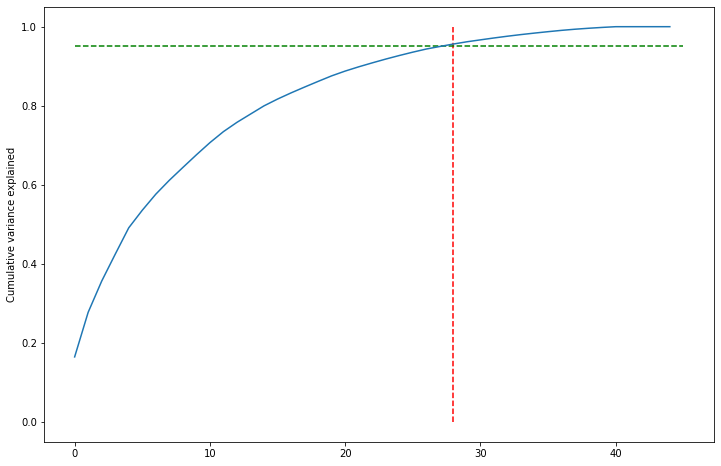

In [132]:
# Instantiate
pca = PCA(random_state=42)

# Evaluate on train data set
pca.fit(X_train)
print (X_train.shape)

# get PCA params
pca.get_params()

# PCA components
pca.components_

# Explained variance ratio for each component
pca.explained_variance_ratio_

# Calculate cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

# Scree plot for explained variance with cumulative probability
fig = plt.figure(figsize=[12,8])
plt.vlines(x=28, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=45, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

(30884, 28)


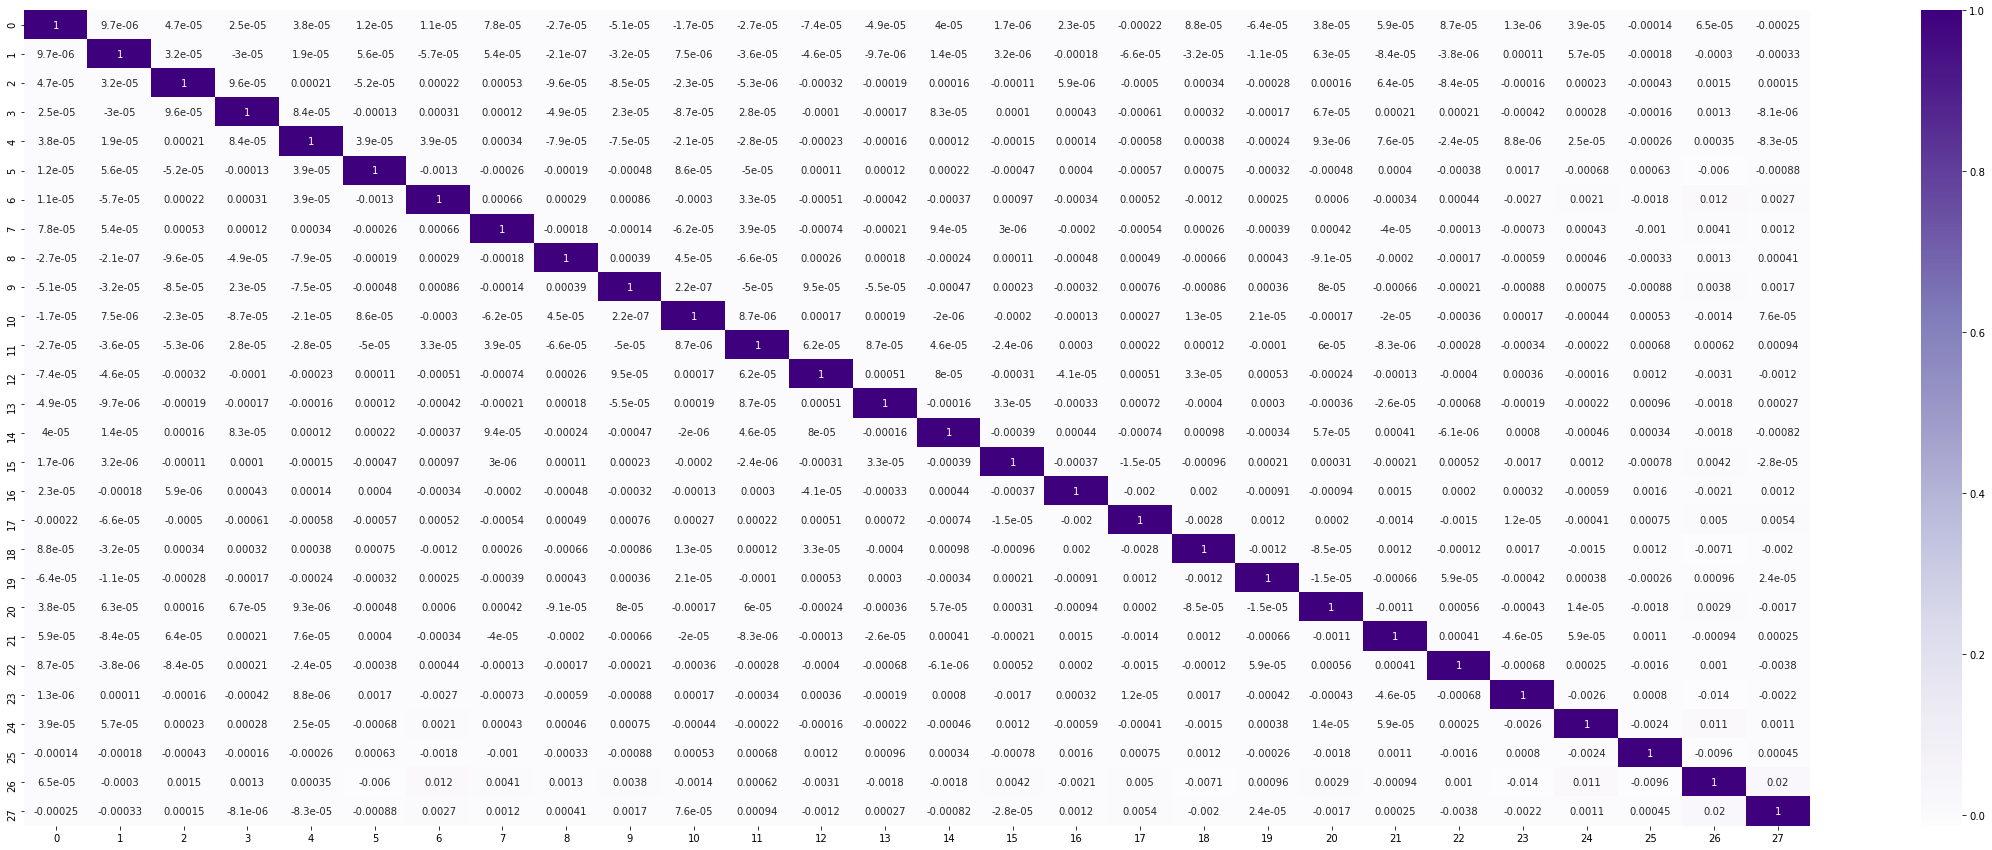

In [133]:
# Perform IncrementalPCA with 28 components
inc_pca = IncrementalPCA(n_components=28)
inc_pca.get_params()

# Store PCs in another dataframe
df_tel_train_pca = inc_pca.fit_transform(X_train)
print(df_tel_train_pca.shape)
df_tel_train_pca

# Obtain correlation matrix and plot heatmap to check for correlation
corrmat = np.corrcoef(df_tel_train_pca.transpose())

plt.figure(figsize=(40,15))
sns.heatmap(corrmat, annot=True, cmap="Purples")
plt.show()

In [134]:
# Use logistic regression in the data on PCA components

# Initialize
learner_pca = LogisticRegression()

# Using logistic regression model on PCs
model_pca = learner_pca.fit(df_tel_train_pca, y_train)

In [135]:
# Predict on train dataset
telecom_churn_3 = predict_train_dataset(df_tel_train_pca, y_train, model_pca)
telecom_churn_3.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0,0,0
1,0,0,1,0
2,0,1,2,1
3,0,0,3,0
4,0,0,4,0


### Metrics using Logistic Regression PCA

In [136]:
# Get metrics
get_metrics('Logistic Regression with PCA', telecom_churn_3)

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                12901   2541
1                 2687  12755
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011
Logistic Regression with PCA,0.830721,0.833878,0.825994,0.829917


In [137]:
# Storing test dataset without id
X_test_new = X_test.drop('id', axis=1)
X_test_new.shape

(30000, 45)

In [138]:
# Applying transformation on test dataset
df_tel_test_pca = inc_pca.transform(X_test_new)
df_tel_test_pca.shape

(30000, 28)

### Export test predictions (III)

In [139]:
# export test predictions
assess_and_export_predictions(X_test, df_tel_test_pca, model_pca, 3)

,id,churn_probability
0,69999,1
1,70000,0
2,70001,1
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,1
29998,99997,1


## <a id="id11">XGBoost Classifier</a>

In [140]:
# Instantiate XGBoost classifier
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

# Get instantiation params
xgb_cfl.get_params()

# Creating another dataframe without id column
X_test_new = X_test.drop('id', axis=1)

# Fit the model to our train and target using default params
xgb_cfl.fit(X_train, y_train) 

[17:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
# Predict on train dataset
telecom_churn_4 = predict_train_dataset(X_train, y_train, xgb_cfl)
telecom_churn_4.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0,0,0
1,0,0,1,0
2,0,0,2,0
3,0,0,3,0
4,0,0,4,0


### Metrics on XGBoost

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                15393     49
1                   53  15389
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011
Logistic Regression with PCA,0.830721,0.833878,0.825994,0.829917
XGBoost (default),0.996697,0.996826,0.996568,0.996697


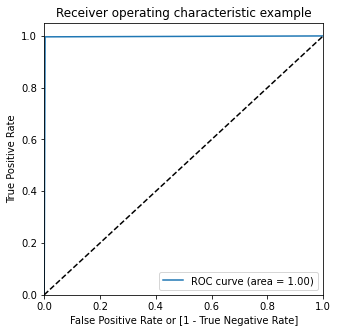

In [142]:
# Get metrics
display(get_metrics('XGBoost (default)', telecom_churn_4))
# ROC curve
draw_roc(telecom_churn_4.actual_churn, telecom_churn_4.predicted_churn)

### Export test predictions (IV)

In [143]:
# Export test predictions
assess_and_export_predictions(X_test, X_test_new, xgb_cfl, 4)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


## <a id="id12">XGBoost with Hyperparameter tuning</a>

In [144]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 10
random_search = RandomizedSearchCV(xgb_cfl, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='accuracy', 
                                   n_jobs=-1, 
                                   cv=6, 
                                   verbose=3, 
                                   random_state=42)


# fit
random_search.fit(X_train, y_train)

# Best estimator
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)

# best_params
best_params = random_search.best_params_
best_params

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 17.6min finished


[17:37:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best accuracy for 5-fold search with 10 parameter combinations:
0.9659394594065276

 Bes

{'subsample': 1.0,
 'n_estimators': 500,
 'min_child_weight': 10,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.6}

In [145]:
# Initializing XGBoostClassifier with best hyperparameters
xgb_cf2 = xgb.XGBClassifier(n_jobs=-1, 
                            objective='binary:logistic', 
                            subsample=best_params['subsample'], 
                            n_estimators=best_params['n_estimators'], 
                            min_child_weight=best_params['min_child_weight'], 
                            max_depth=best_params['max_depth'],
                            learning_rate=best_params['learning_rate'],
                            gamma=best_params['gamma'],
                            colsample_bytree=best_params['colsample_bytree'])

# Fit the model to our train and target
xgb_cf2.fit(X_train, y_train)

[17:38:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
# Predict on train dataset
telecom_churn_5 = predict_train_dataset(X_train, y_train, xgb_cf2)
telecom_churn_5.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0,0,0
1,0,0,1,0
2,0,0,2,0
3,0,0,3,0
4,0,0,4,0


### Metrics on XGBoost with hyparameter tuning

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                15337    105
1                  141  15301
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011
Logistic Regression with PCA,0.830721,0.833878,0.825994,0.829917
XGBoost (default),0.996697,0.996826,0.996568,0.996697
XGBoost with hyperparameter,0.992035,0.993184,0.990869,0.992025


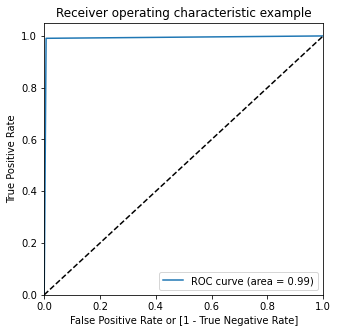

In [147]:
# Get metrics
display(get_metrics('XGBoost with hyperparameter', telecom_churn_5))

# ROC curve
draw_roc(telecom_churn_5.actual_churn, telecom_churn_5.predicted_churn)

### Export test predictions (V)

In [148]:
# Export test predictions
xgboost_hpt_preds = assess_and_export_predictions(X_test, X_test_new, xgb_cf2, 5)

## <a id="id13">Ensemble model using Random forest</a>

In [149]:
# Initialize the classifier
rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=15, oob_score=True)

# Get classifier params
rf.get_params()

# Fit on train data
rf.fit(X_train, y_train)

# OOB score
rf.oob_score_

0.8604131589172387

In [150]:
# Predict on train dataset
telecom_churn_6 = predict_train_dataset(X_train, y_train, rf)
telecom_churn_6.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0,0,0
1,0,0,1,0
2,0,1,2,1
3,0,0,3,0
4,0,0,4,0


### Metrics on Random forest ensemble

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                13690   1752
1                 2173  13269
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011
Logistic Regression with PCA,0.830721,0.833878,0.825994,0.829917
XGBoost (default),0.996697,0.996826,0.996568,0.996697
XGBoost with hyperparameter,0.992035,0.993184,0.990869,0.992025
Random Forest Ensemble,0.872912,0.883363,0.859280,0.871155


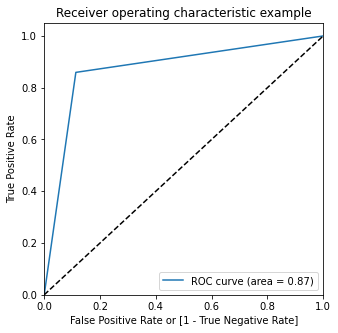

In [151]:
# Get metrics
display(get_metrics('Random Forest Ensemble', telecom_churn_6))

# ROC curve
draw_roc(telecom_churn_6.actual_churn, telecom_churn_6.predicted_churn)

### Export test predictions (VI)

In [152]:
# Export test predictions
assess_and_export_predictions(X_test, X_test_new, rf, 6)

,id,churn_probability
0,69999,1
1,70000,0
2,70001,1
3,70002,1
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,1
29998,99997,0


## <a id="id14">Random forest with hyperparameter tuning</a>

In [153]:
# Instantiate
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Hyperparameters
params = {
    "max_depth": [5, 8, 12, 15, 20],
    "min_samples_leaf": [10, 20, 50],
    "max_features": ['sqrt', 'log2'],
    "n_estimators": [30, 50, 100, 150]
}

# Instantiate grid search model
grid_search = GridSearchCV(estimator=classifier_rf, 
                           param_grid=params, 
                           cv=6, 
                           n_jobs=-1, 
                           scoring="accuracy", 
                           verbose=1)

# Fit the data on train set
grid_search.fit(X_train, y_train)

# best_params
best_params = grid_search.best_params_
best_params

Fitting 6 folds for each of 120 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 29.2min finished


{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [154]:
# Instantiate using hyperparameters
rf2 = RandomForestClassifier(random_state=42,
                             n_jobs=-1,
                             max_depth=best_params['max_depth'],
                             max_features=best_params['max_features'],
                             n_estimators=best_params['n_estimators'],
                             min_samples_leaf=best_params['min_samples_leaf'],
                             oob_score=True)
rf2.get_params()

# Fit on train data
rf2.fit(X_train, y_train)

# OOB score
rf2.oob_score_

0.9499417173941199

In [155]:
# Predict on train dataset
telecom_churn_7 = predict_train_dataset(X_train, y_train, rf2)
telecom_churn_7.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0,0,0
1,0,0,1,0
2,0,1,2,1
3,0,0,3,0
4,0,0,4,0


### Metrics on Random forest ensemble

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                14909    533
1                  294  15148
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011
Logistic Regression with PCA,0.830721,0.833878,0.825994,0.829917
XGBoost (default),0.996697,0.996826,0.996568,0.996697
XGBoost with hyperparameter,0.992035,0.993184,0.990869,0.992025
Random Forest Ensemble,0.872912,0.883363,0.859280,0.871155
Random Forest with hyperparameter,0.973222,0.966010,0.980961,0.973428


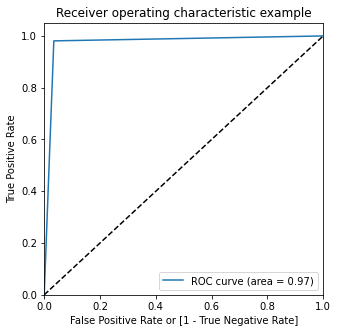

In [156]:
# Get metrics
display(get_metrics('Random Forest with hyperparameter', telecom_churn_7))

# ROC curve
draw_roc(telecom_churn_7.actual_churn, telecom_churn_7.predicted_churn)

### Export test predictions (VII)

In [157]:
# Export test predictions
rf_hpt_preds = assess_and_export_predictions(X_test, X_test_new, rf2, 7)

## <a id="id15">LightGBM Classifier</a>

In [158]:
# Instantiate
lgbm_classifier = LGBMClassifier()

# Get classifier params
lgbm_classifier.get_params()

# Fit on train data
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier()

In [159]:
# Predict the values on train data
telecom_churn_8 = predict_train_dataset(X_train, y_train, lgbm_classifier)
telecom_churn_8.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0,0,0
1,0,0,1,0
2,0,0,2,0
3,0,0,3,0
4,0,0,4,0


### Metrics using LGBM Classifier

In [160]:
# Get metrics on train dataset
get_metrics('LGBM Classifier', telecom_churn_8)

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                15151    291
1                  286  15156
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011
Logistic Regression with PCA,0.830721,0.833878,0.825994,0.829917
XGBoost (default),0.996697,0.996826,0.996568,0.996697
XGBoost with hyperparameter,0.992035,0.993184,0.990869,0.992025
Random Forest Ensemble,0.872912,0.883363,0.859280,0.871155
Random Forest with hyperparameter,0.973222,0.966010,0.980961,0.973428
LGBM Classifier,0.981317,0.981161,0.981479,0.981320


### Export test predictions (VIII)

In [161]:
# export preductions
assess_and_export_predictions(X_test, X_test_new, lgbm_classifier, 8)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


## <a id="id16">LGBM Classifier with hyperparameter tuning</a>

In [162]:
# Instantiate
lgbm_classifier_2 = LGBMClassifier(random_state=42, n_jobs=-1)

params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 10, 20],
    'n_estimators': [10, 50, 100, 200],
}

grid_search = GridSearchCV(estimator=lgbm_classifier_2, 
                           param_grid=params, 
                           cv=6, 
                           n_jobs=-1, 
                           scoring="accuracy", 
                           verbose=1)

# Fit the model on train data
grid_search.fit(X_train, y_train)

# Get best params
grid_search.best_estimator_

Fitting 6 folds for each of 80 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  6.7min finished


LGBMClassifier(learning_rate=0.2, max_depth=10, n_estimators=200,
               random_state=42)

In [163]:
# Initialize best estimator
lgbm_classifier = grid_search.best_estimator_

# Check params
lgbm_classifier.get_params()

# Fit on train data
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.2, max_depth=10, n_estimators=200,
               random_state=42)

In [164]:
# Predict on train data
telecom_churn_9 = predict_train_dataset(X_train, y_train, lgbm_classifier)
telecom_churn_9.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0,0,0
1,0,0,1,0
2,0,0,2,0
3,0,0,3,0
4,0,0,4,0


### Metrics using LGBM Classifier with hyperparameter tuning

In [165]:
# Get metrics on train dataset
get_metrics('LGBM Classifier with hyperparameter tuning', telecom_churn_9)

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                15441      1
1                    1  15441
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011
Logistic Regression with PCA,0.830721,0.833878,0.825994,0.829917
XGBoost (default),0.996697,0.996826,0.996568,0.996697
XGBoost with hyperparameter,0.992035,0.993184,0.990869,0.992025
Random Forest Ensemble,0.872912,0.883363,0.859280,0.871155
Random Forest with hyperparameter,0.973222,0.966010,0.980961,0.973428
LGBM Classifier,0.981317,0.981161,0.981479,0.981320
LGBM Classifier with hyperparameter tuning,0.999935,0.999935,0.999935,0.999935


### Export test predictions (IX)

In [166]:
# export
lgbm_hpt_preds = assess_and_export_predictions(X_test, X_test_new, lgbm_classifier, 9)

## <a id="id17">Catboost Classifier</a>

In [167]:
# Instantiate classifier
cat_boost_clf = CatBoostClassifier(iterations=50)

# Get params
cat_boost_clf.get_params()

# Fit on train data (default learning rate = 0.5)
cat_boost_clf.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4317952	total: 214ms	remaining: 10.5s
1:	learn: 0.3447356	total: 276ms	remaining: 6.62s
2:	learn: 0.3220758	total: 348ms	remaining: 5.44s
3:	learn: 0.2998274	total: 420ms	remaining: 4.83s
4:	learn: 0.2780589	total: 483ms	remaining: 4.34s
5:	learn: 0.2659340	total: 546ms	remaining: 4s
6:	learn: 0.2415790	total: 602ms	remaining: 3.7s
7:	learn: 0.2330473	total: 663ms	remaining: 3.48s
8:	learn: 0.2260035	total: 756ms	remaining: 3.44s
9:	learn: 0.2095997	total: 822ms	remaining: 3.29s
10:	learn: 0.2026532	total: 875ms	remaining: 3.1s
11:	learn: 0.1953187	total: 931ms	remaining: 2.95s
12:	learn: 0.1892706	total: 979ms	remaining: 2.79s
13:	learn: 0.1837159	total: 1.02s	remaining: 2.61s
14:	learn: 0.1778989	total: 1.05s	remaining: 2.45s
15:	learn: 0.1728098	total: 1.08s	remaining: 2.3s
16:	learn: 0.1671968	total: 1.12s	remaining: 2.17s
17:	learn: 0.1606407	total: 1.16s	remaining: 2.07s
18:	learn: 0.1562758	total: 1.22s	remaining: 1.99s
19:	learn: 0.1544582	t

In [168]:
# Predict on train dataset
telecom_churn_10 = predict_train_dataset(X_train, y_train, cat_boost_clf)
telecom_churn_10.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0,0,0
1,0,0,1,0
2,0,0,2,0
3,0,0,3,0
4,0,0,4,0


### Metrics for Cat Boost Classifier

In [169]:
# Get metrics
get_metrics('CatBoost (default)', telecom_churn_10)

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                15120    322
1                  422  15020
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011
Logistic Regression with PCA,0.830721,0.833878,0.825994,0.829917
XGBoost (default),0.996697,0.996826,0.996568,0.996697
XGBoost with hyperparameter,0.992035,0.993184,0.990869,0.992025
Random Forest Ensemble,0.872912,0.883363,0.859280,0.871155
Random Forest with hyperparameter,0.973222,0.966010,0.980961,0.973428
LGBM Classifier,0.981317,0.981161,0.981479,0.981320
LGBM Classifier with hyperparameter tuning,0.999935,0.999935,0.999935,0.999935
CatBoost (default),0.975910,0.979012,0.972672,0.975832


### Export test predictions (X)

In [170]:
# export predictions
assess_and_export_predictions(X_test, X_test_new, cat_boost_clf, 10)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


## <a id="id18">Catboost with hyperparameter tuning</a>

In [171]:
# Instantiate classifier
catboost_classifier = CatBoostClassifier(random_state=42)

# grid search cv
params = {
    'max_depth': [5, 10, 20, 30],
    'learning_rate': [0.05, 0.1, 0.5, 1],
    'n_estimators': [10, 50, 100]
}

grid_search = GridSearchCV(estimator=catboost_classifier,
                          param_grid=params,
                          cv=6,
                          n_jobs=-1,
                          scoring="accuracy",
                          verbose=1)

# fit
grid_search.fit(X_train, y_train)

# best_params_
grid_search.best_params_

# best_estimator_
cb_clf = grid_search.best_estimator_
cb_clf

Fitting 6 folds for each of 48 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 15.5min finished


0:	learn: 0.3667185	total: 363ms	remaining: 35.9s
1:	learn: 0.2883035	total: 639ms	remaining: 31.3s
2:	learn: 0.2493357	total: 906ms	remaining: 29.3s
3:	learn: 0.2212898	total: 1.16s	remaining: 27.9s
4:	learn: 0.2015228	total: 1.43s	remaining: 27.1s
5:	learn: 0.1859481	total: 1.68s	remaining: 26.4s
6:	learn: 0.1712622	total: 1.96s	remaining: 26s
7:	learn: 0.1572318	total: 2.21s	remaining: 25.4s
8:	learn: 0.1495387	total: 2.46s	remaining: 24.9s
9:	learn: 0.1391617	total: 2.72s	remaining: 24.5s
10:	learn: 0.1329459	total: 2.98s	remaining: 24.1s
11:	learn: 0.1257154	total: 3.24s	remaining: 23.8s
12:	learn: 0.1189763	total: 3.51s	remaining: 23.5s
13:	learn: 0.1112481	total: 3.77s	remaining: 23.1s
14:	learn: 0.1062271	total: 4.03s	remaining: 22.9s
15:	learn: 0.0976035	total: 4.3s	remaining: 22.6s
16:	learn: 0.0909822	total: 4.57s	remaining: 22.3s
17:	learn: 0.0843682	total: 4.84s	remaining: 22s
18:	learn: 0.0799651	total: 5.09s	remaining: 21.7s
19:	learn: 0.0771003	total: 5.33s	remaining: 2

In [172]:
# Predict on train dataset
telecom_churn_11 = predict_train_dataset(X_train, y_train, cb_clf)
telecom_churn_11.head()

,actual_churn,predicted_churn_prob,cust_id,predicted_churn
0,0,0,0,0
1,0,0,1,0
2,0,0,2,0
3,0,0,3,0
4,0,0,4,0


In [173]:
# Get the metrics
get_metrics('CatBoost with hyperparameter tuning', telecom_churn_11)

----- Confusion Matrix -----
predicted_churn      0      1
actual_churn                 
0                15442      0
1                    1  15441
----------------------------


,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011
Logistic Regression with PCA,0.830721,0.833878,0.825994,0.829917
XGBoost (default),0.996697,0.996826,0.996568,0.996697
XGBoost with hyperparameter,0.992035,0.993184,0.990869,0.992025
Random Forest Ensemble,0.872912,0.883363,0.859280,0.871155
Random Forest with hyperparameter,0.973222,0.966010,0.980961,0.973428
LGBM Classifier,0.981317,0.981161,0.981479,0.981320
LGBM Classifier with hyperparameter tuning,0.999935,0.999935,0.999935,0.999935
CatBoost (default),0.975910,0.979012,0.972672,0.975832


### Export test predictions (XI)

In [174]:
# export test data predictions
cat_boost_hpt_preds = assess_and_export_predictions(X_test, X_test_new, cb_clf, 11)

## <a id="id19">Stacked model</a>

In [175]:
# Merge the test prediction datasets
# xgboost_hpt_preds - Predictions done using XGBoost hyperparameter tuned classifier
# rf_hpt_preds - Predictions done using hyparameter tuned random forest classifier
# lgbm_hpt_preds - Predictions done using LGBM hyperparameter tuned classifier
# cat_boost_hpt_preds - Predictions done using CATBoost hyperparameter tuned classifier

stacked_preds_df = xgboost_hpt_preds.merge(rf_hpt_preds, how='inner', on='id')
stacked_preds_df.rename(columns={'churn_probability_x': 'xgboost_cp', 'churn_probability_y': 'rf_cp'}, inplace=True)

stacked_preds_df= stacked_preds_df.merge(lgbm_hpt_preds, how='inner', on='id')
stacked_preds_df.rename(columns={'churn_probability': 'lgbm_cp'}, inplace=True)

stacked_preds_df = stacked_preds_df.merge(cat_boost_hpt_preds, how='inner', on='id')
stacked_preds_df.rename(columns={'churn_probability': 'cat_boost_cp'}, inplace=True)

stacked_preds_df.head()

,id,xgboost_cp,rf_cp,lgbm_cp,cat_boost_cp
0,69999,0,0,0,0
1,70000,0,0,0,0
2,70001,0,1,0,1
3,70002,0,0,0,0
4,70003,0,0,0,0


In [176]:
# Final output will be 1 if more than 50% of the model predicts it as 1 else 0
def get_cp_val(x):
    x_cols = ['xgboost_cp', 'rf_cp', 'lgbm_cp', 'cat_boost_cp']
    avg = x[x_cols].sum()/len(x_cols)
    if (avg >= 0.5):
        return 1
    else:
        return 0
    
stacked_preds_df['churn_probability'] = stacked_preds_df.apply(lambda x: get_cp_val(x), axis=1)
stacked_preds_df.head()

,id,xgboost_cp,rf_cp,lgbm_cp,cat_boost_cp,churn_probability
0,69999,0,0,0,0,0
1,70000,0,0,0,0,0
2,70001,0,1,0,1,1
3,70002,0,0,0,0,0
4,70003,0,0,0,0,0


### Export test predictions (XII)

In [177]:
# Export stacked predictions
stacked_preds_df.to_csv("final_predictions.csv", index=False, columns = ['id', 'churn_probability'])

## <a id="id20">Feature importance with xgboost classifier</a>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

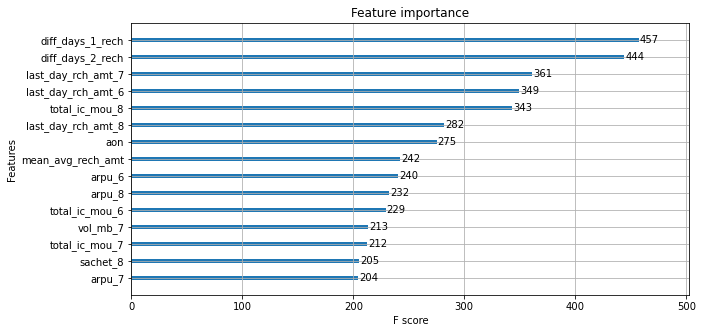

In [178]:
#Feature importance with xgboost classifier
plt.rcParams["figure.figsize"] = (10, 5)
display (plot_importance(xgb_cf2, max_num_features=15))
plt.show()

**Observation :**
1. If the difference between the last recharge dates between August and July is high, there is a high chance that the customer will churn.
2. Similar is the case with the difference in the recharge dates for the months of June and July.

## <a id="id21">Feature importance with Random forest classifier</a>

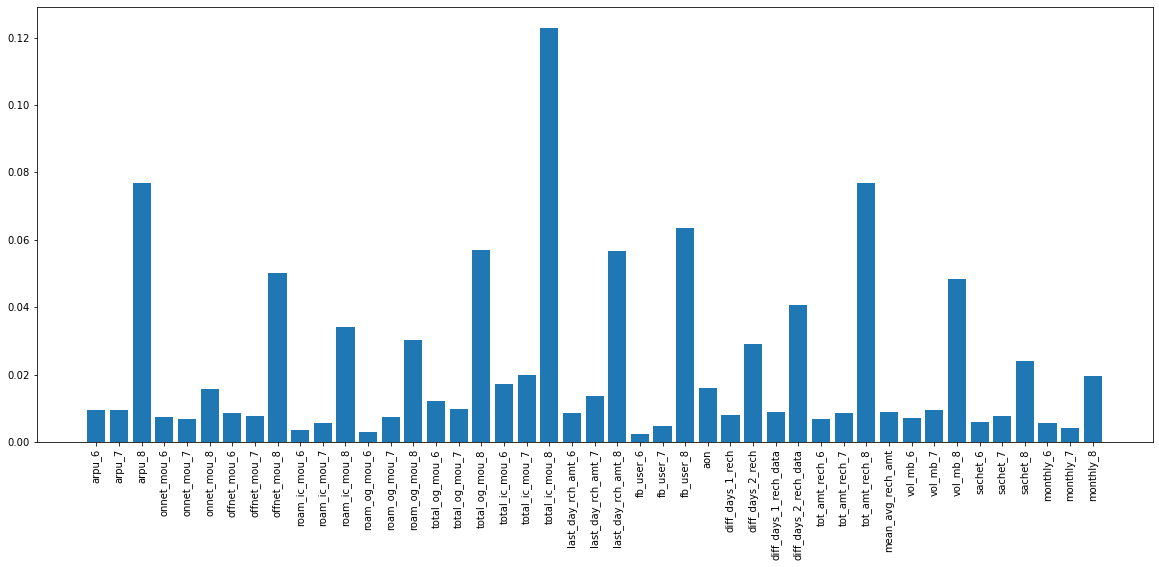

In [179]:
# Get importances
importance = rf2.feature_importances_

# Initialize dict to store mapping between feature names and corresponding importance score
features = {}
for feature, imp in zip(X_train.columns, importance):
    features[feature] = imp

# plot feature importance
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.bar([x for x in features.keys()], importance)
plt.show()

**Observations :**
`total_ic_mou_8`, `arpu_6`, `total_amt_rech_8` shows strong importance comparatively

## <a id="id22">Feature importance with LGBM classifier</a>

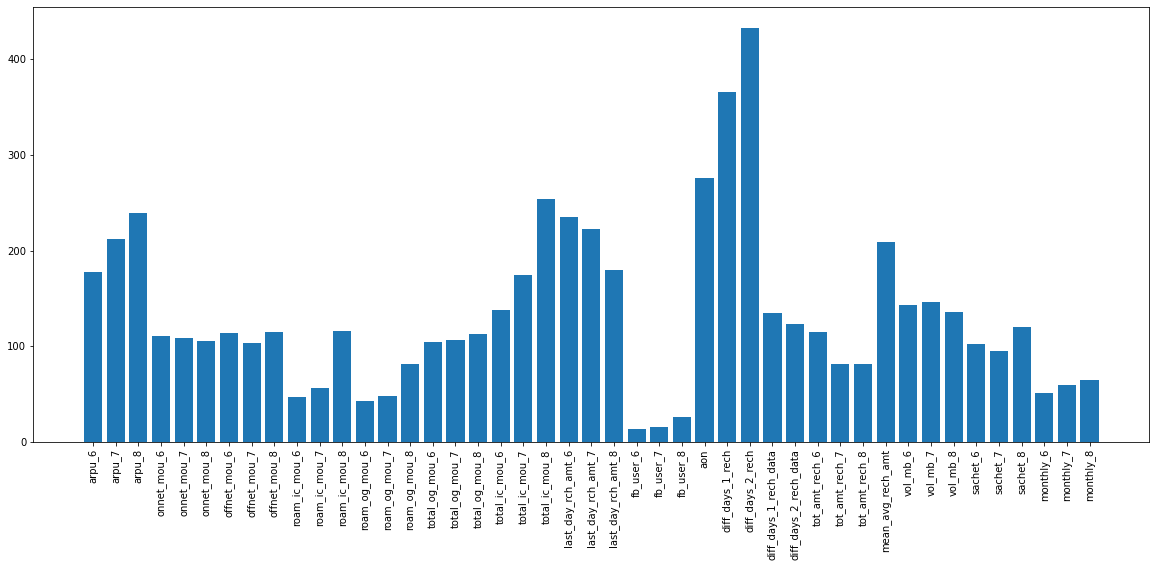

In [180]:
# Get importances
importance = lgbm_classifier.feature_importances_

# Initialize dict to store mapping between feature names and corresponding importance score
features = {}
for feature, imp in zip(X_train.columns, importance):
    features[feature] = imp

# plot feature importance
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.bar([x for x in features.keys()], importance)
plt.show()

## <a id="id23">Feature importance with Catboost classifier</a>

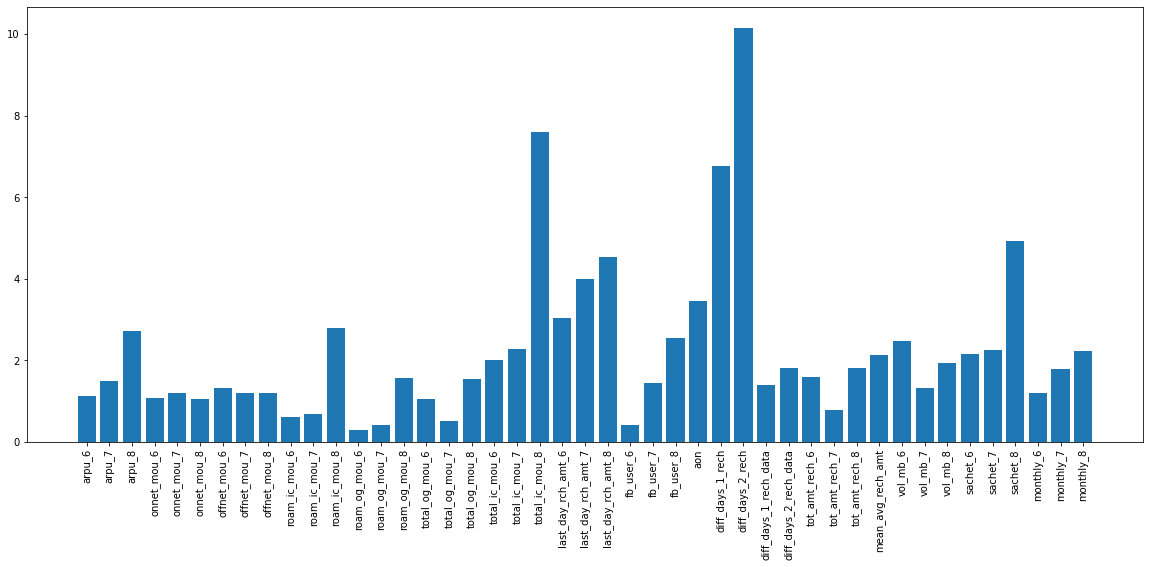

In [181]:
# Get importances
importance = cb_clf.feature_importances_

# Initialize dict to store mapping between feature names and corresponding importance score
features = {}
for feature, imp in zip(X_train.columns, importance):
    features[feature] = imp

# plot feature importance
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.bar([x for x in features.keys()], importance)
plt.show()

## <a id="id24">Business recommendations</a>

- We have seen that the churn probability is more in cases when there is a huge difference in the recharge dates whether it be amount recharge or data recharge.

- To cope up with this, the telecom operator needs to roll out few exciting offers for high value customers so that they can be retained and these customers can recharge as per their favourite plans.

- Also, we can see that churn customers uses too many sachet plans in the month of August which indicates their short term retention in the current telecom operator.

## <a id="id25">Model selection based on other business objectives</a>

In [182]:
# Fetch final metrics
get_final_metrics()

,Accuracy,Precision,Recall,F1 Score
Logistic Regression with RFE,0.838719,0.837038,0.841212,0.839120
Logistic Regression (RFE) + manual tuning,0.835384,0.832841,0.839205,0.836011
Logistic Regression with PCA,0.830721,0.833878,0.825994,0.829917
XGBoost (default),0.996697,0.996826,0.996568,0.996697
XGBoost with hyperparameter,0.992035,0.993184,0.990869,0.992025
Random Forest Ensemble,0.872912,0.883363,0.859280,0.871155
Random Forest with hyperparameter,0.973222,0.966010,0.980961,0.973428
LGBM Classifier,0.981317,0.981161,0.981479,0.981320
LGBM Classifier with hyperparameter tuning,0.999935,0.999935,0.999935,0.999935
CatBoost (default),0.975910,0.979012,0.972672,0.975832


**Business objectives :**
1. Since, the main business objective of this project is accuracy, we will be choosing a model which has **high accuracy** in both train and test set.


2. Another business objective can be that no matter how the non-churn customers are predicted, the actual churn customers needs to be predicted correctly. Given that, the telecom operator will be rolling out offers to high risk customers, it won't be any big deal to roll out offers to wrongly predicted non-churn customers. In such cases, we need to ensure that **recall is low**.


3. Again, if the company is running on losses, it can't roll out offers even for wrongly predicted non-churn customers.


4. If business wants to maximize the correctness of actual churn customers, **precision** will be the best metric to go for. We can go with the model which gives high precision.

## <a id="id26">Data dictionary</a>

In [183]:
#Load Data Dictionary
import ipywidgets as widgets
button = widgets.Button(description='Load Data Dictionary')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        data_dict = pd.read_csv("data_dictionary.csv")
        display(data_dict)
button.on_click(on_button_clicked) 

widgets.VBox([button,out]) 